<a href="https://colab.research.google.com/github/dimon-ton/colab_quiz_generator/blob/mistral_ocr/quiz_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install google-generativeai
!pip install python-docx
!pip install mistralai
!pip install img2pdf

In [60]:
content_type = 'แบบฝึก' # @param ["แบบฝึก", "แผนการจัดการเรียนรู้"]
quiz_type = 'ปลายภาค' # @param ["ปลายภาค", "กลางภาค"]
semester = 'ภาคเรียนที่ 2' # @param ["ภาคเรียนที่ 1", "ภาคเรียนที่ 2"]
edu_year = '2567' # @param {type:"string"}
class_grade = 'ชั้นประถมศึกษาปีที่ 6'  # @param ["ชั้นประถมศึกษาปีที่ 1", "ชั้นประถมศึกษาปีที่ 2", "ชั้นประถมศึกษาปีที่ 3", "ชั้นประถมศึกษาปีที่ 4", "ชั้นประถมศึกษาปีที่ 5", "ชั้นประถมศึกษาปีที่ 6", "ชั้นมัธยมศึกษาปีที่ 1", "ชั้นมัธยมศึกษาปีที่ 2", "ชั้นมัธยมศึกษาปีที่ 3"]
quiz_number = '40' # @param {type:"string", placeholder:"ใส่จำนวนข้อเป็นตัวเลข"}
score = '1' # @param {type:"string", placeholder:"ข้อละกี่คะแนน"}
total_score = int(quiz_number) * int(score)
period = '60' # @param {type:"string", placeholder:"ใส่เวลาเป็นนาที"}
subject_name = 'ภาษาอังกฤษ' #@param {type:"string", placeholder:"ใส่ชื่อวิชา"}
subject_code = 'อ 16101' #@param {type:"string"}
# set random status
random_choice_status = True #@param {type:"boolean"}
image_include = False #@param {type:"boolean"}

In [80]:
from google.colab import drive
from google.colab import files

import os
import shutil


# connect to google drive
def is_drive_mounted():
  """Checks if Google Drive is mounted."""
  return os.path.exists('/content/drive')

if not is_drive_mounted():
  drive.mount('/content/drive')
else:
  print("Drive is already mounted.")


def upload_images_to_drive(target_folder):
  """Uploads image files from the user's computer to a specified folder in Google Drive.

  Args:
    target_folder: The path to the folder in Google Drive where images will be stored.
      This folder should already exist in your Drive.
  """




  # Remove existing files in the target folder
  if os.path.exists(target_folder):
    for filename in os.listdir(target_folder):
      file_path = os.path.join(target_folder, filename)
      try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
          os.unlink(file_path)
        elif os.path.isdir(file_path):
          shutil.rmtree(file_path)
      except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))
    print(f"Existing files removed from '{target_folder}'.")



  # Create the target folder if it doesn't exist
  if not os.path.exists(target_folder):
    os.makedirs(target_folder)
    print(f"Folder '{target_folder}' created in Google Drive.")

  # Prompt the user to upload images
  uploaded = files.upload()

  # Save uploaded images to the target folder
  for filename, data in uploaded.items():
    with open(os.path.join(target_folder, filename), 'wb') as f:
      f.write(data)
    print(f"File '{filename}' uploaded to '{target_folder}'.")




def list_files_with_paths(folder_path):
  """Lists all files with their full paths within a specified folder.

  Args:
    folder_path: The path to the folder you want to list files from.

  Returns:
    A list of strings, where each string is the full path to a file
    within the specified folder.
  """
  file_paths = []
  for root, _, files in os.walk(folder_path):
    for file in files:
      file_paths.append(os.path.join(root, file))
  return file_paths



target_folder = "/content/drive/MyDrive/โรงเรียนบ้านโพนแท่น/output_images"
upload_images_to_drive(target_folder)
file_lists = list_files_with_paths(target_folder)


Drive is already mounted.
Existing files removed from '/content/drive/MyDrive/โรงเรียนบ้านโพนแท่น/output_images'.


Saving 20250123_095316842.jpg to 20250123_095316842.jpg
Saving 20250123_095233665.jpg to 20250123_095233665.jpg
Saving 20250123_095348850.jpg to 20250123_095348850.jpg
Saving 20250123_095332513.jpg to 20250123_095332513.jpg
Saving 20250123_095358854.jpg to 20250123_095358854.jpg
Saving 20250123_095301618.jpg to 20250123_095301618.jpg
Saving 20250123_095336314.jpg to 20250123_095336314.jpg
Saving 20250123_095257843.jpg to 20250123_095257843.jpg
Saving 20250123_095321540.jpg to 20250123_095321540.jpg
Saving 20250123_095239922.jpg to 20250123_095239922.jpg
Saving 20250123_095345236.jpg to 20250123_095345236.jpg
Saving 20250123_102207715.jpg to 20250123_102207715 (4).jpg
Saving 20250123_102215128.jpg to 20250123_102215128 (4).jpg
Saving 20250123_102242937.jpg to 20250123_102242937 (4).jpg
Saving 20250123_102202972.jpg to 20250123_102202972 (4).jpg
Saving 20250123_102227824.jpg to 20250123_102227824 (4).jpg
Saving 20250123_102231607.jpg to 20250123_102231607 (4).jpg
Saving 20250123_10215073

In [81]:
import img2pdf
import os

def images_to_pdf(image_path, output_pdf_path):

    # image_path is the path of image files in a folder
    img_file_name = os.listdir(image_path)
    img_paths = [f'{image_path}/{img}' for img in img_file_name]

    try:
        # Validate image paths
        for image_path in img_paths:
            if not os.path.exists(image_path):
                raise FileNotFoundError(f"The image file {image_path} does not exist.")

        # Convert images to PDF
        with open(output_pdf_path, "wb") as f:
            f.write(img2pdf.convert(img_paths))

        print(f"PDF successfully created at {output_pdf_path}")

    except Exception as e:
        print(f"An error occurred: {e}")


# upload file to specific folder and get path



# convert images to a pdf file
image_path = target_folder
output_pdf_path = "output.pdf"
images_to_pdf(image_path, output_pdf_path)

PDF successfully created at output.pdf


In [82]:
from mistralai import Mistral, ImageURLChunk, TextChunk, DocumentURLChunk
import base64
from pathlib import Path
import json


from google.colab import userdata


def remove_lines_starting_with(text, prefix):
    """
    Remove lines that start with a specific prefix while preserving the format.

    :param text: The input text as a string.
    :param prefix: The prefix to check for (e.g., '!').
    :return: The text with lines starting with the prefix removed.
    """
    # Split the text into lines
    lines = text.splitlines()

    # Filter out lines that start with the prefix
    filtered_lines = [line for line in lines if not line.strip().startswith(prefix)]

    # Join the remaining lines back into a single string
    cleaned_text = "\n".join(filtered_lines)

    return cleaned_text

def get_text_ocr(pdf_file):
    # Retrieve Mistral API key
    mistral_api_key = userdata.get('MISTRAL_API')
    client = Mistral(api_key=mistral_api_key)


    pdf_file = Path(pdf_file)
    assert pdf_file.is_file()


    uploaded_file = client.files.upload(
        file={
            "file_name": pdf_file.stem,
            "content": pdf_file.read_bytes(),
        },
        purpose="ocr",
    )

    signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

    pdf_response = client.ocr.process(document=DocumentURLChunk(document_url=signed_url.url), model="mistral-ocr-latest", include_image_base64=True)

    response_dict = json.loads(pdf_response.model_dump_json())
    json_string = json.dumps(response_dict, indent=4, ensure_ascii=False)
    print(response_dict)

    ocr_content_list = []

    for page in response_dict["pages"]:
      ocr_content_list.append(page["markdown"])

    msg = "\n\n".join(ocr_content_list)

    msg = remove_lines_starting_with(msg,"!")
    return msg


In [125]:
import google.generativeai as palm
from IPython.display import Markdown

from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

import PIL.Image
import ast


palm.configure(api_key=GOOGLE_API_KEY)


def extract_text_from_image():


  model = palm.GenerativeModel(model_name="gemini-1.5-pro-latest")

  try:


    # prompt = """

    #จากไฟล์ภาพทั้งหมดเป็นเนื้อหาจากแบบฝึกสำหรับการเรียนภาษาอังกฤษ ชั้นประถมศึกษาปีที่ 3 สร้างข้อสอบ 4 ตัวเลือก
    #เพื่อสอบเก็บคะแนนวิชาภาษาอังกฤษ โดยใช้สอบนักเรียนชั้นประถมศึกษาปีที่ 3 นักเรียนอ่านประโยคภาษาอังกฤษไม่ค่อยได้
    #ความยากในระดับง่าย จำนวน 30 ข้อ ในส่วนที่ต้องใช้ภาพให้แสดงพรอมพ์ที่ใช้เจนภาพแทน และแสดงเฉลยที่ท้ายข้อสอบ

    #"""



    example_response = """
        questions = [
            {
                'question': 'What is this?',
                'choices': ['It is a bat.', 'It is running.', 'It is cold.', 'It is mine.'],
            },
        ]
    """

    msg = get_text_ocr(output_pdf_path) # get text from ocr process



    prompt = f"""
    จากไฟล์เป็นเนื้อหาจาก{content_type}สำหรับการเรียน{subject_name} {class_grade} ให้สร้างข้อสอบ 4 ตัวเลือก
    เพื่อสอบเก็บคะแนนวิชา{subject_name} โดยใช้สอบนักเรียน{class_grade} {'' if content_type == 'แผนการจัดการเรียนรู้' else 'นักเรียนอ่านประโยคภาษาอังกฤษไม่ค่อยได้'}
    ระดับความยากให้อยู่ในระดับง่าย จำนวน {int(quiz_number) + 2} ข้อ ให้ตอบเป็นรูป Python list เท่านั้น โดยไม่มีคำอธิบายอื่นใด
    ให้แสดงเฉลยด้วย โดยให้เพิ่ม key 'anwser' ใน dictionary
    {'' if not image_include else "หากจำเป็นต้องใช้รูปภาพ ให้เพิ่ม key 'image' ใน dictionary และระบุพรอมต์ที่ใช้สร้างรูปภาพ (เช่น คำอธิบายหรือคำสั่งสำหรับ AI เพื่อสร้างรูปภาพ)"}

    ***ตัวอย่าง output***
    {example_response}

    *** ให้ใช้เนื้อหาต่อไปนี้เพื่อใช้สร้างข้อสอบ ***

    {msg}

    ***คำสั่งสำคัญ***
    - คำตอบทั้งหมดต้องเป็น Python list โดยไม่มีคำอธิบายหรือข้อความเพิ่มเติม
    - ผลลัพธ์ต้องถูกจัดให้อยู่ในรูปของ list ตามที่ระบุ
    - อย่ารวมคำอธิบายอื่นใดนอกจากการตอบเป็น list
    - ใน choices จะต้องมีสมาชิกจำนวน 4 ตัว ไม่ว่าจะเป็นชั้นไหนก็ตาม

    """



    print(prompt)

    output = model.generate_content(prompt)


    # return my output in python list
    questions = output.parts[0].text

    print(questions)

    # Assuming 'questions' contains the text string with extra content
    try:
        # Remove the extra text "python\nquestions = "
        start_index = questions.find("[")
        questions_str = questions[start_index:-3]


        # Convert the remaining string to a list using ast.literal_eval
        questions_list = ast.literal_eval(questions_str)

        # cut the member of
        # question_list = question_list[:int(quiz_number)]

        print(questions_list)
    except (SyntaxError, ValueError, AttributeError) as e:
        print(f"Error converting to list: {e}")



    return questions_list
  except Exception as e:
    print(f"Error extracting text from image: {e}")
    return None




{'pages': [{'index': 0, 'markdown': "# การย่านตารางเวลา (Timetable) \n\nการย่านตารางเดินรถ (Travel Timetable) ในตารางเดินรถ (รถไฟ รถโดยสาร เครื่องบิน) เวลาที่ใช้ในตารางจะเป็น 1 นาทิกาถึง 24 นาทิกา แต่ในการย่านตารางจะต้องบอก in the morning, in the afternoon และ in the evening ด้วย เช่น\n\n| Station | Time |  |\n| :-- | :--: | :--: |\n|  | ARR | DEP |\n| Chiang Mai | - | 17.15 |\n| Lamphun | 17.40 | 17.50 |\n| Lampang | 19.45 | 19.55 |\n| Den Chai | 21.55 | 22.05 |\n| Uttaradit | 22.50 | 23.10 |\n| Phitsanulok | 01.00 | - |\n\n$$\n\\begin{aligned}\n& \\text { ARR = Arrive } \\quad \\text { (รถเข้าสถานี) } \\\\\n& \\text { DEP = Departure } \\quad \\text { (รถออกจากสถานี) }\n\\end{aligned}\n$$\n\n1. The train leaves Chiang Mai at five fifteen in the evening.\n2. The train arrives at Den Chai at nine fifty-five in the evening.\n3. The train arrives at Phitsanulok at one o'clock in the morning.\n\n## การย่านตารางลอน\n\n| Day <br> Time | $8.30-9.20$ | $9.20-10.15$ | $10.30-11.20$ | $11.20-12
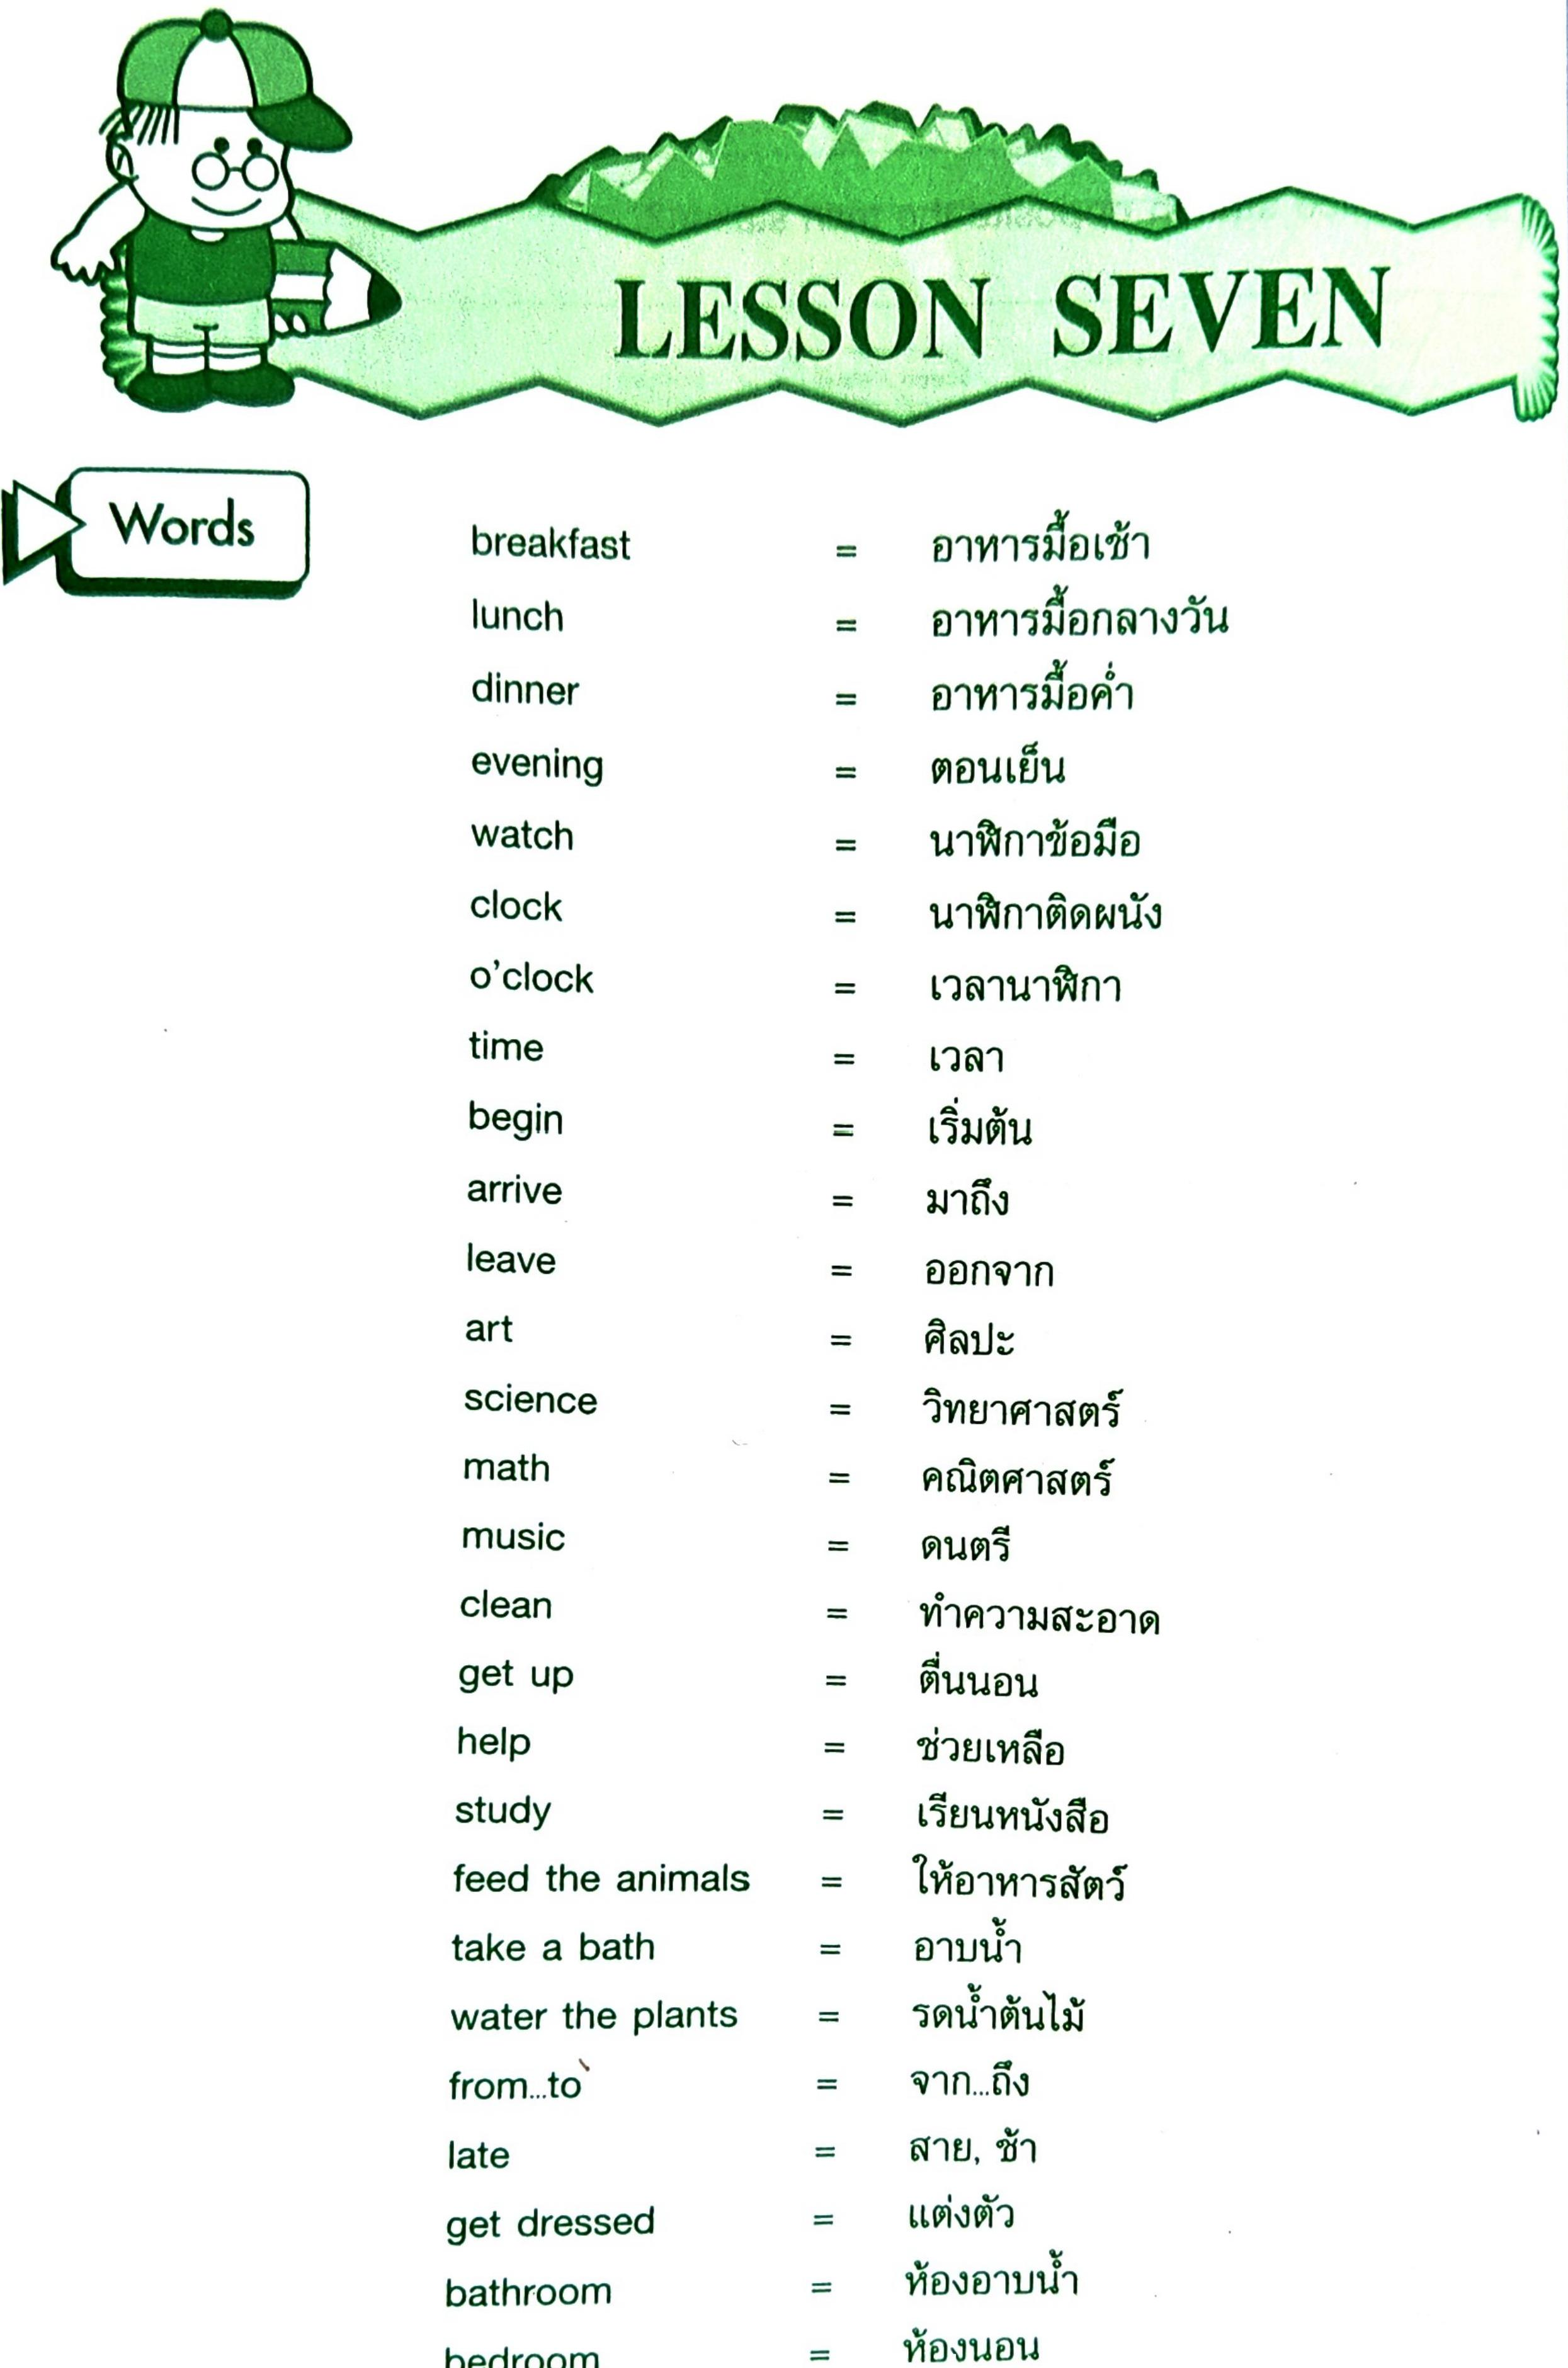
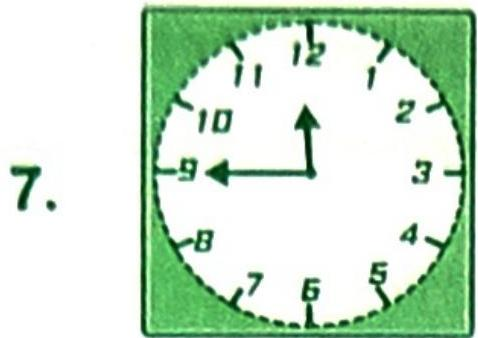
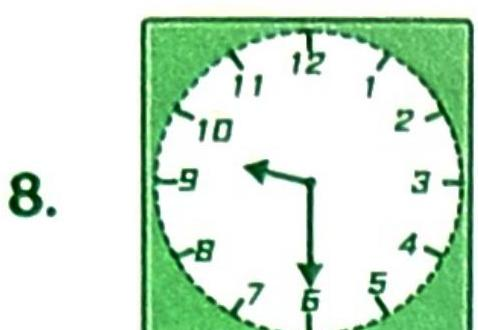
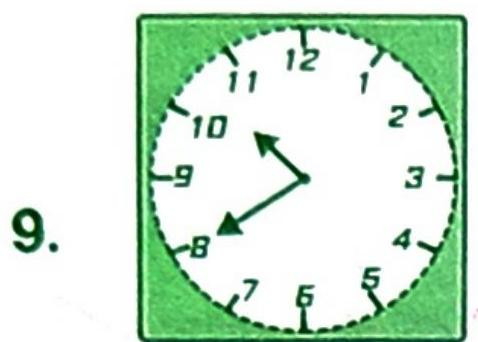
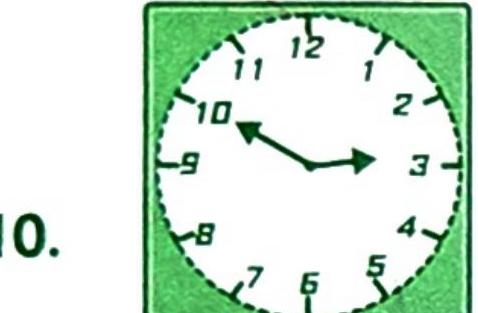
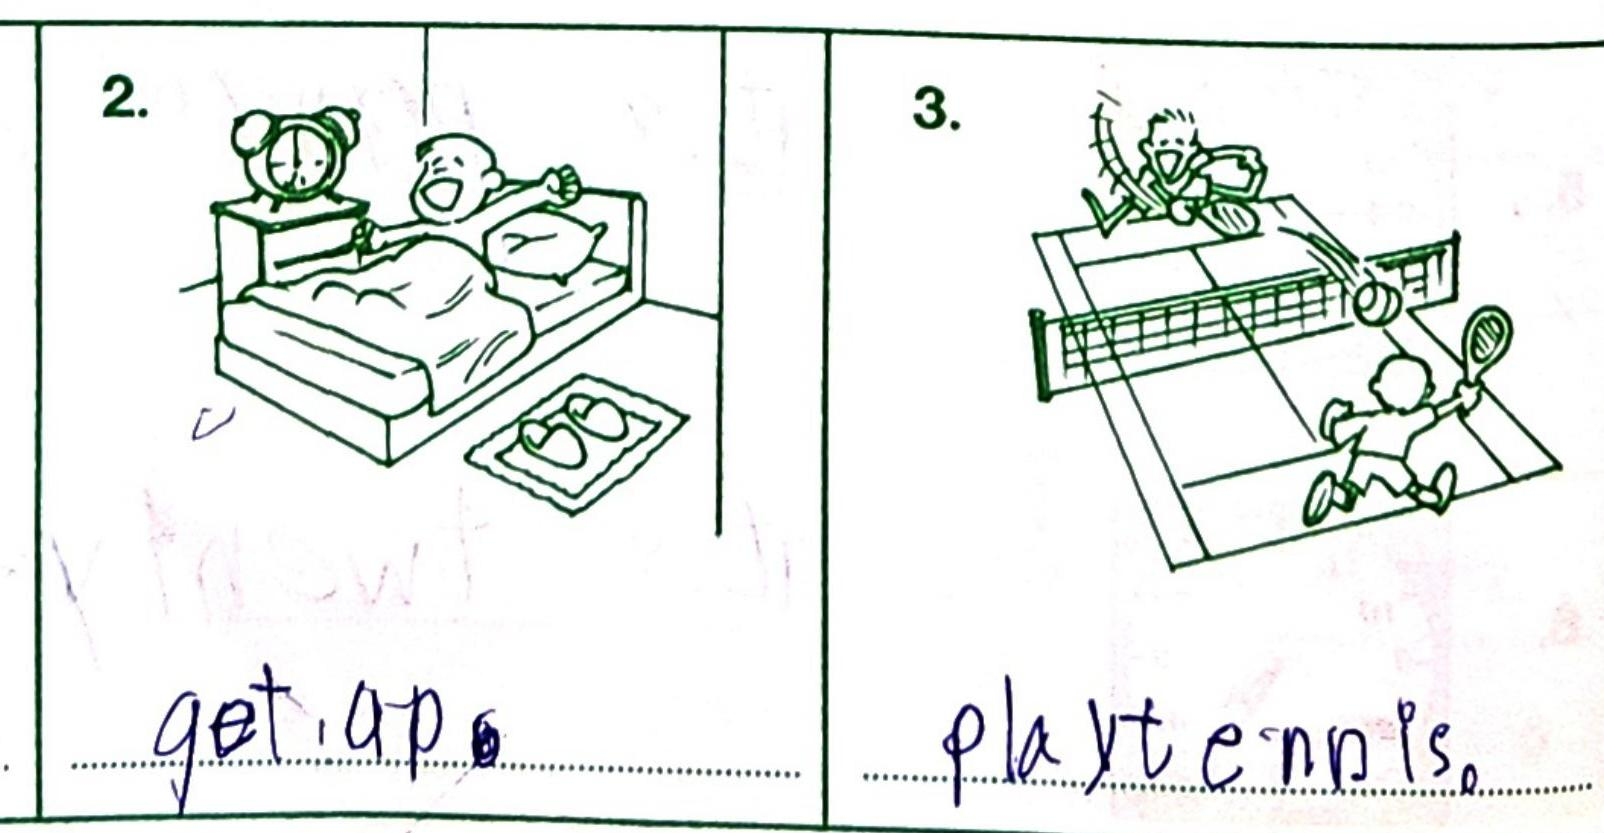
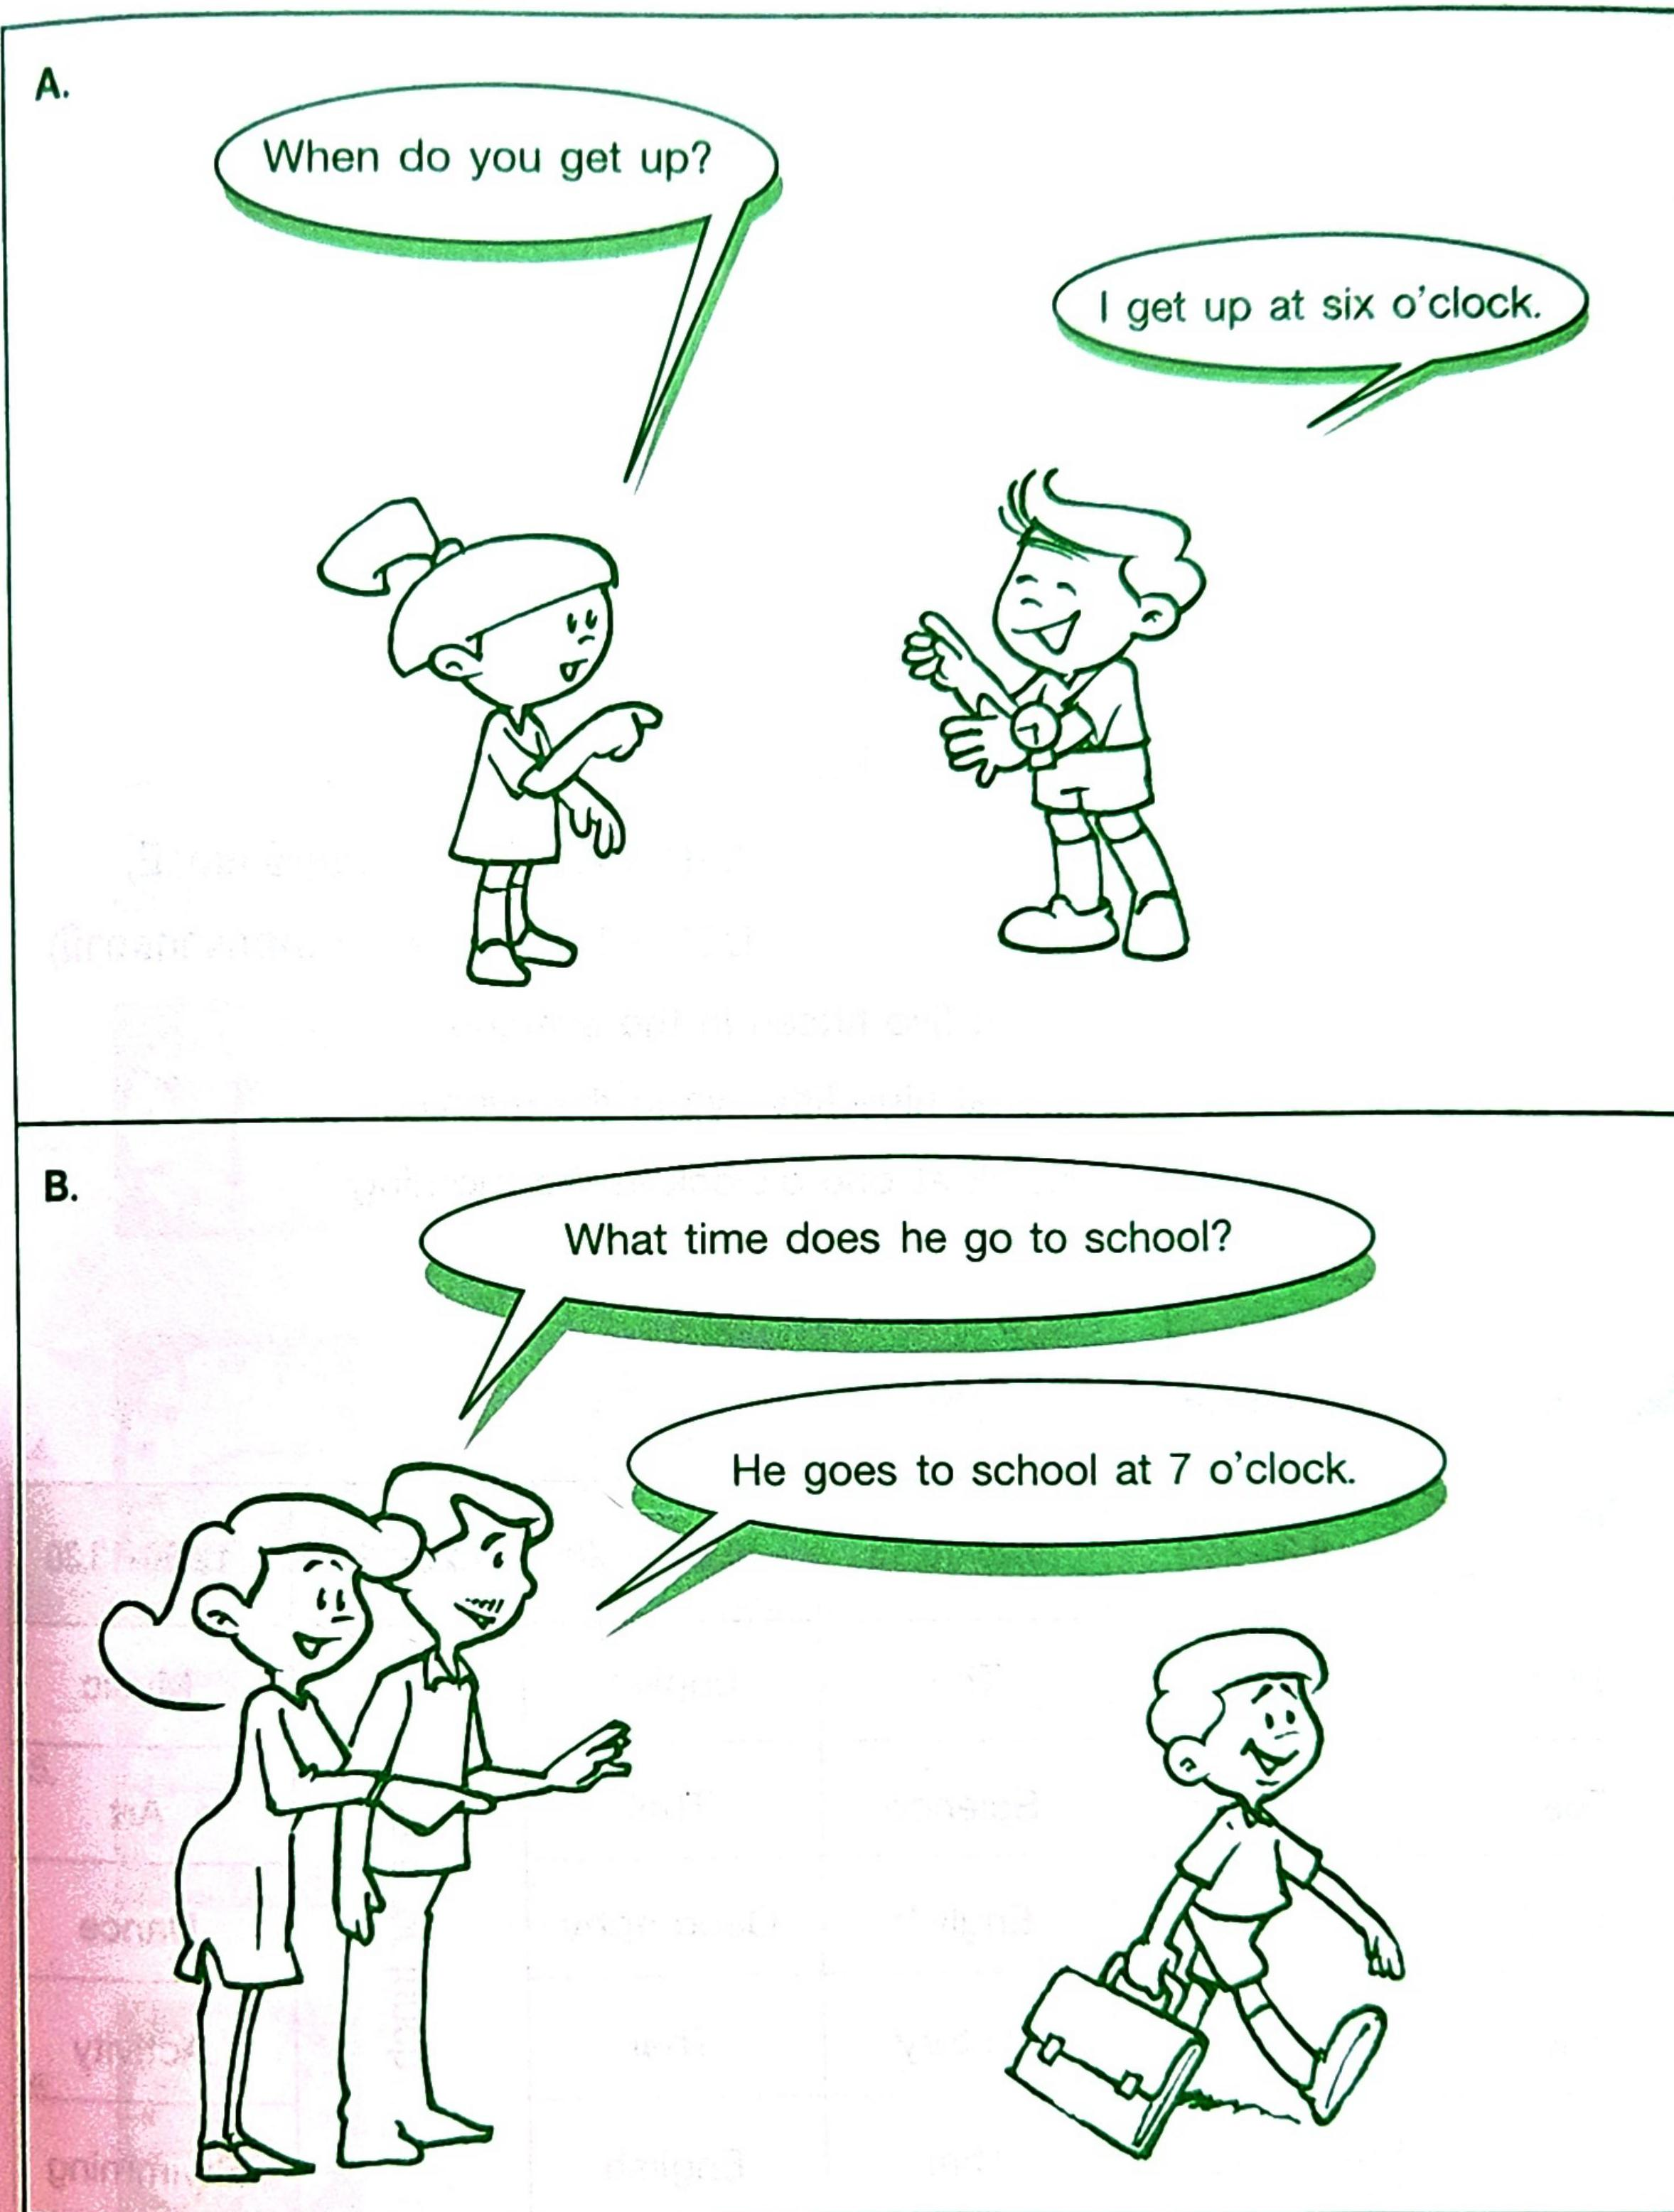
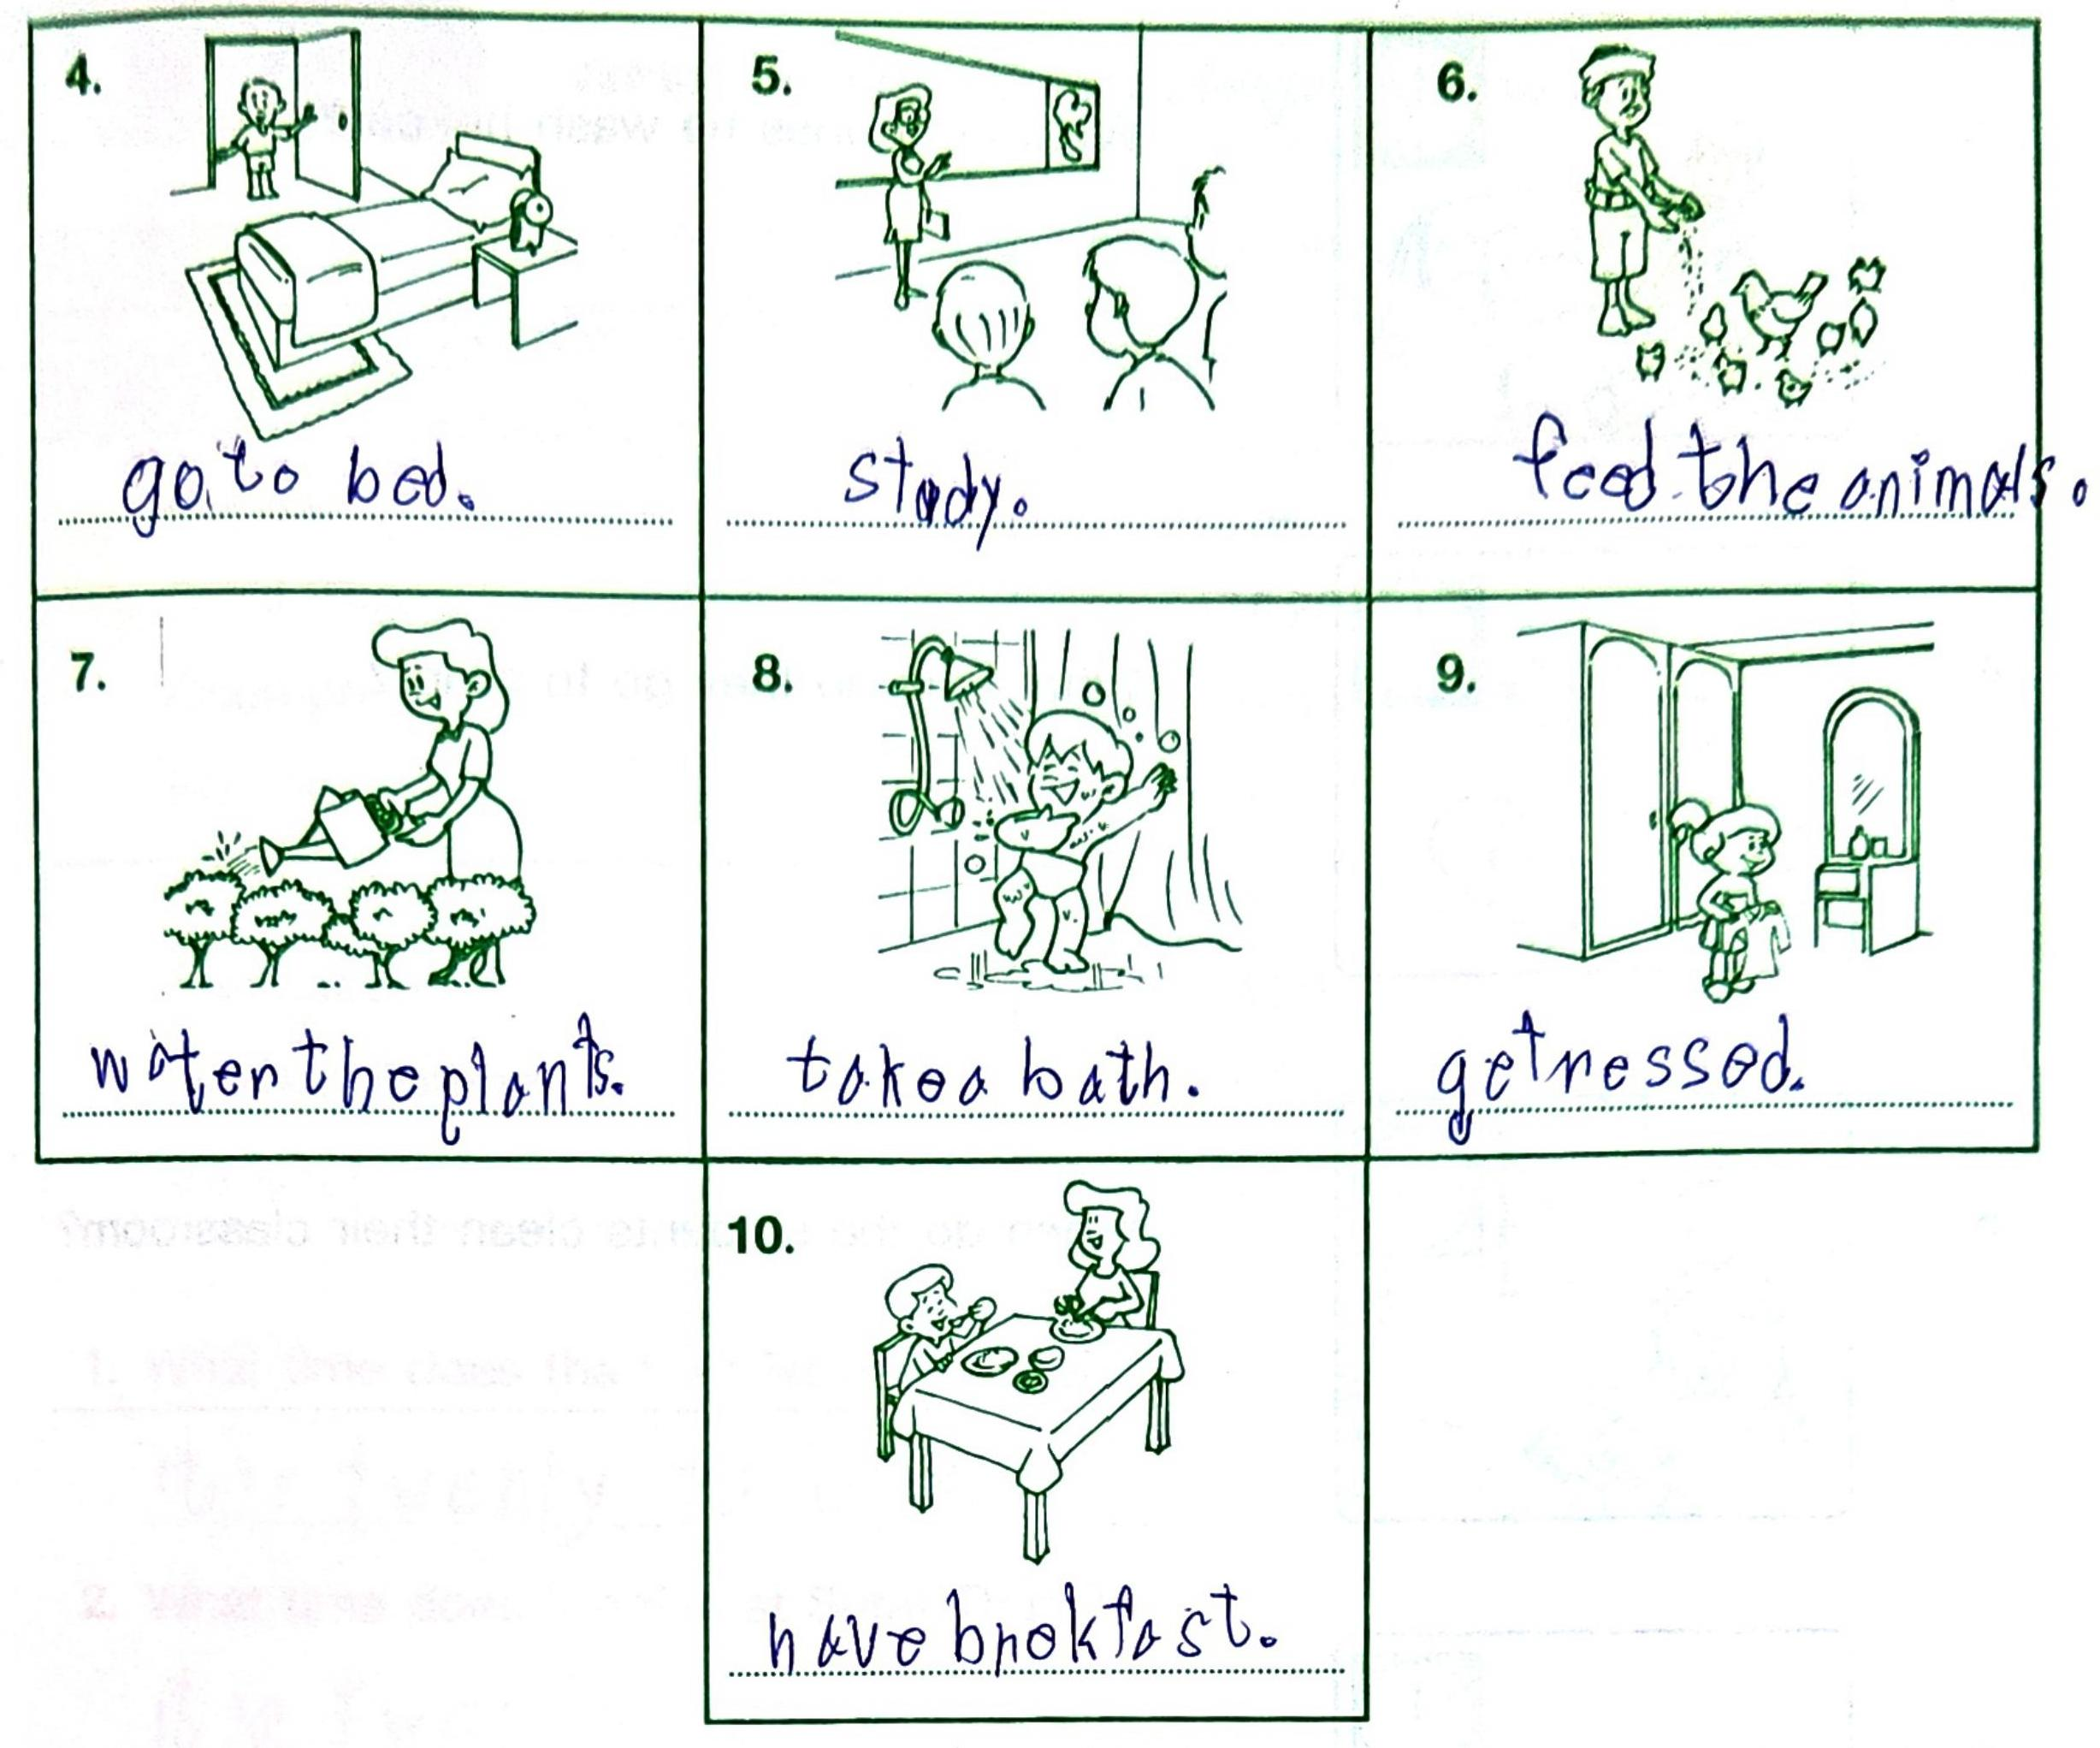
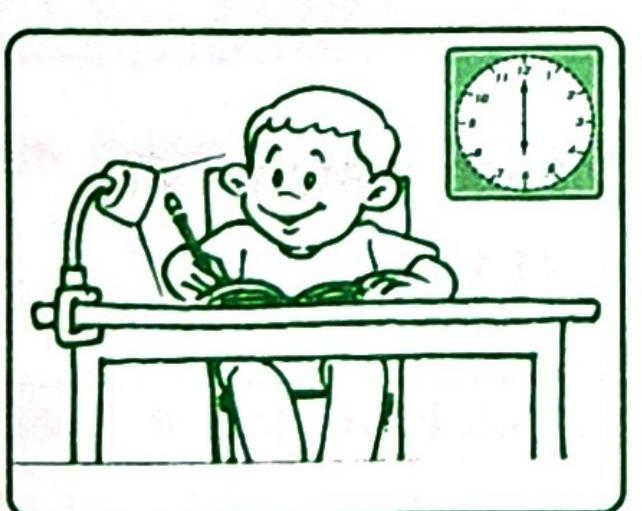
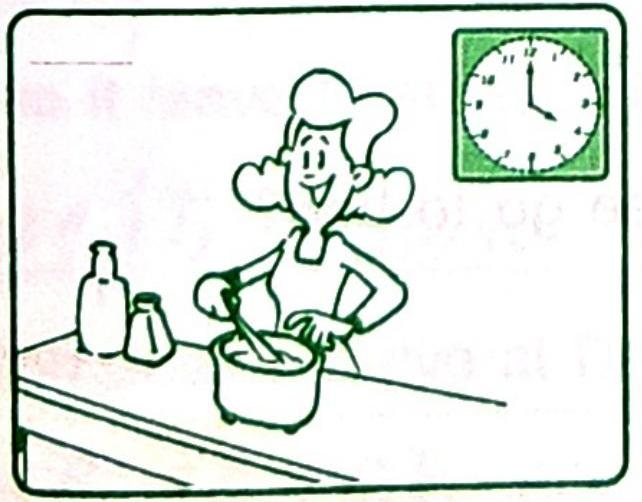
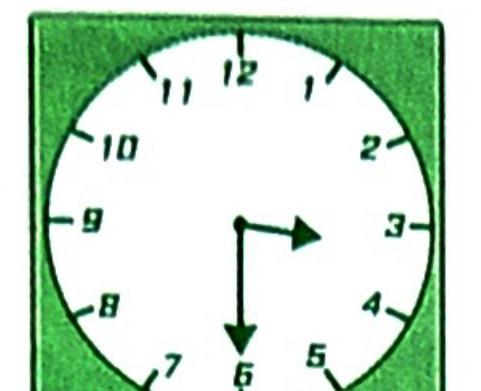
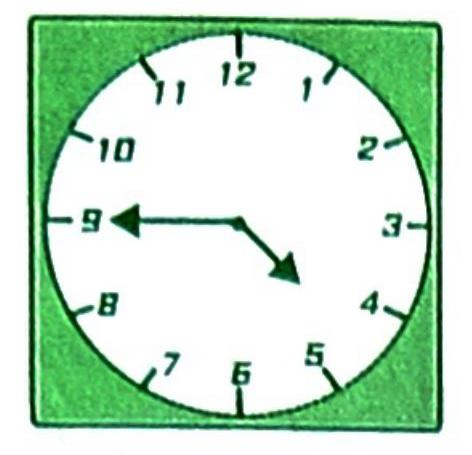
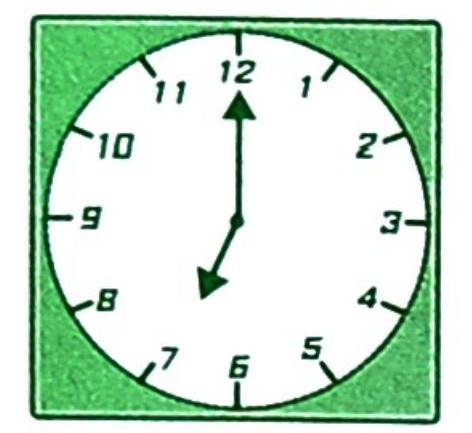
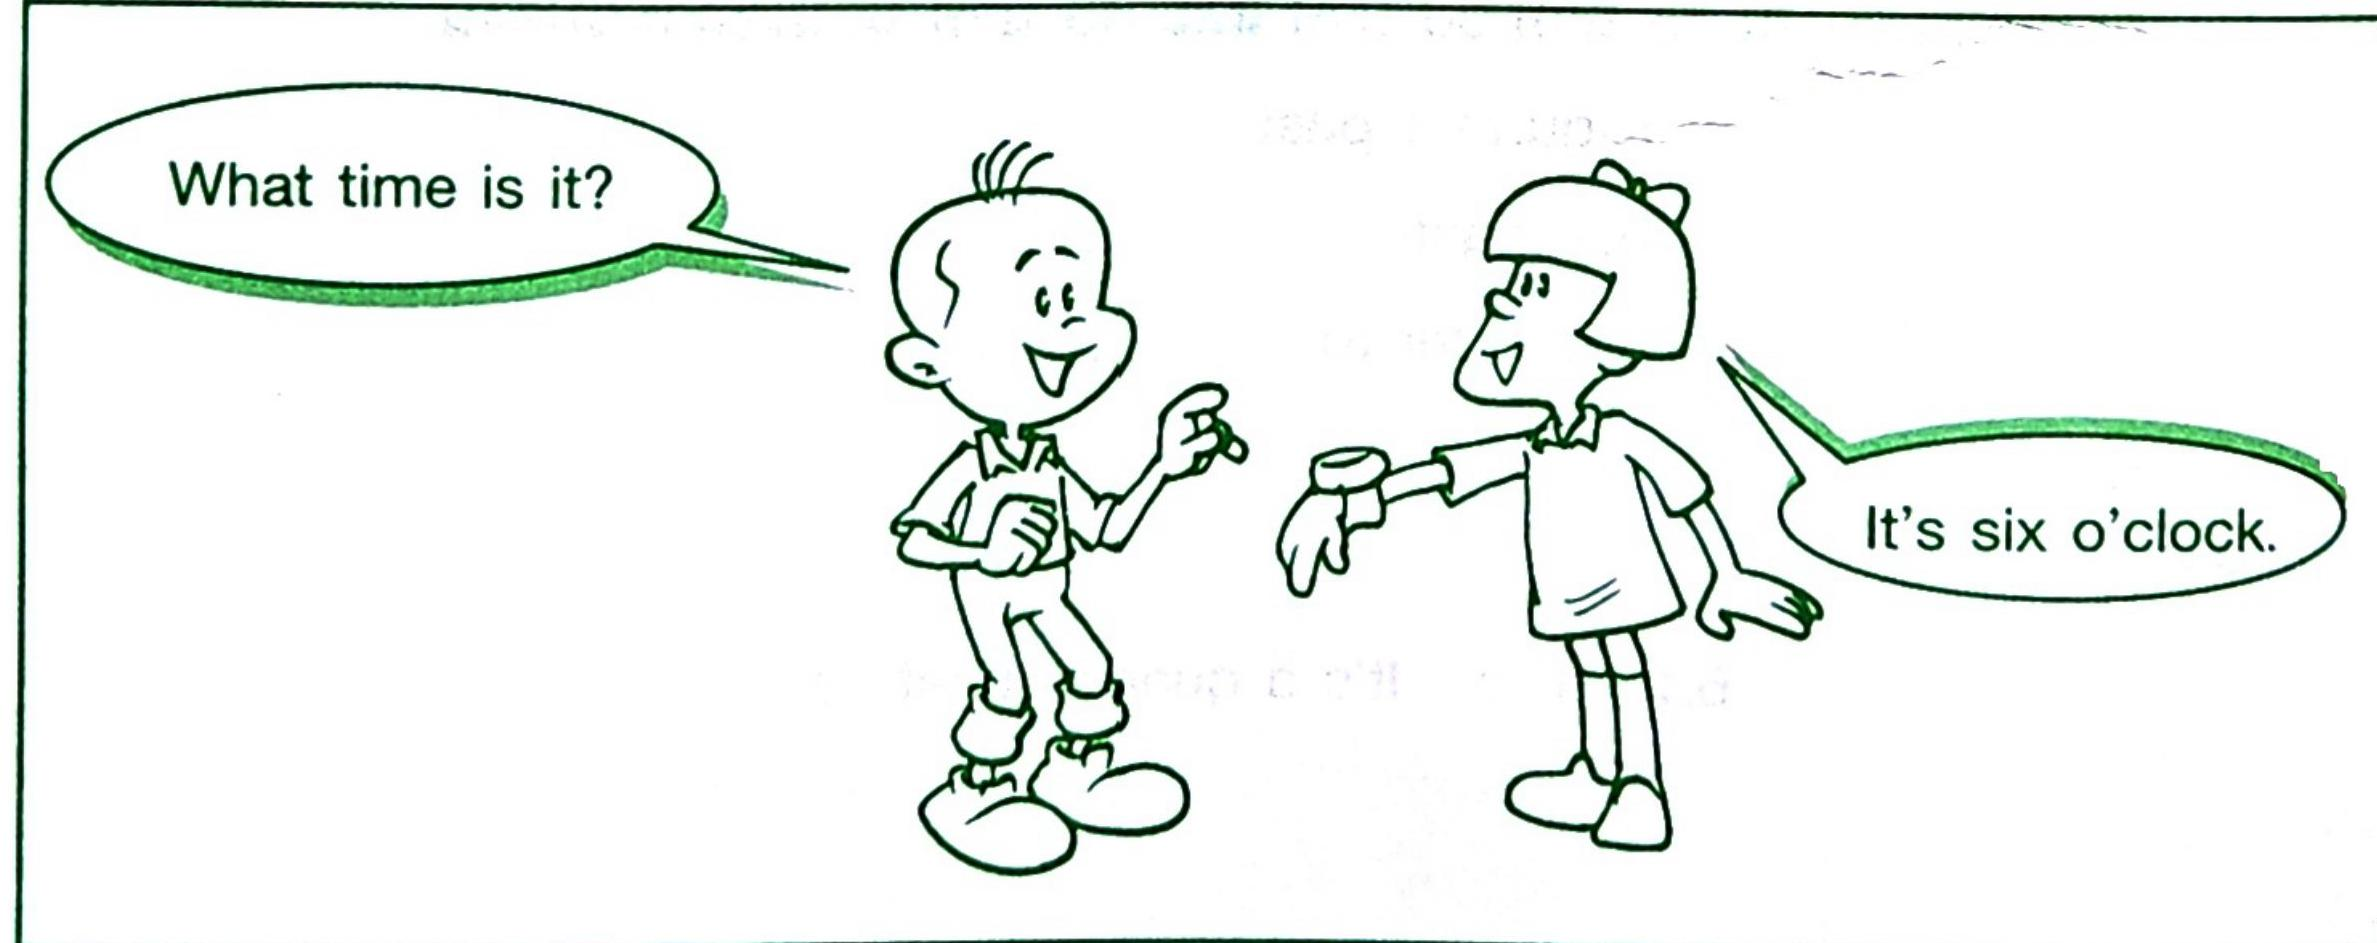
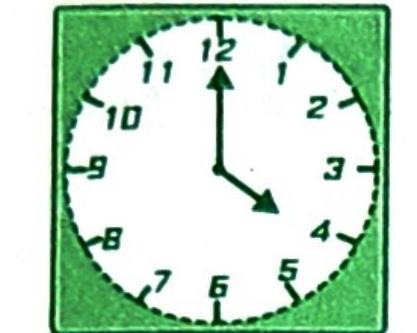
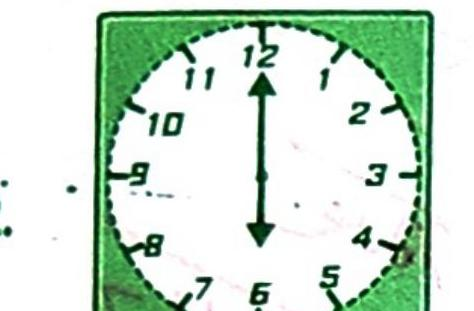
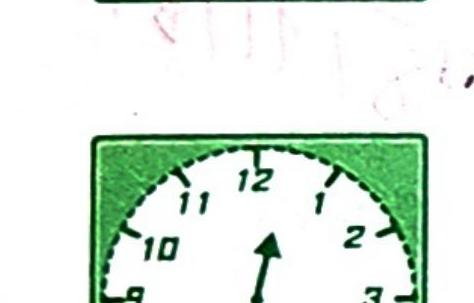
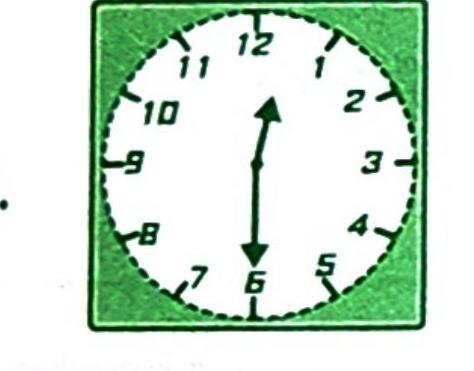
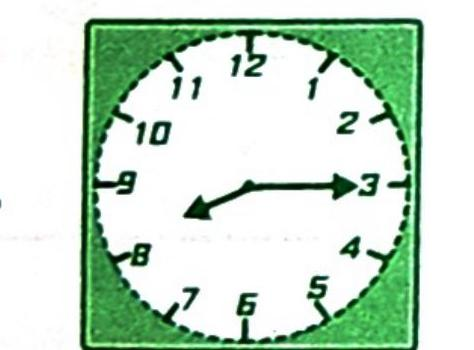
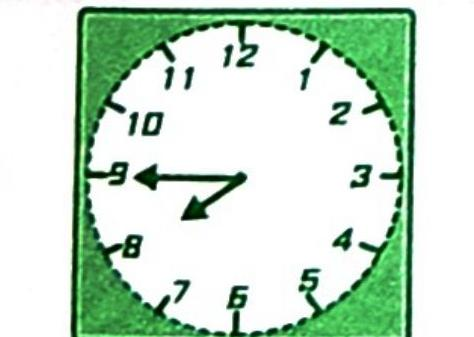
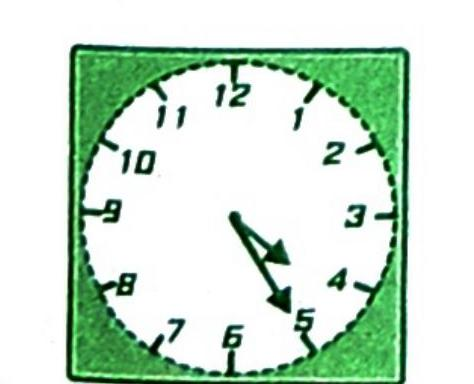
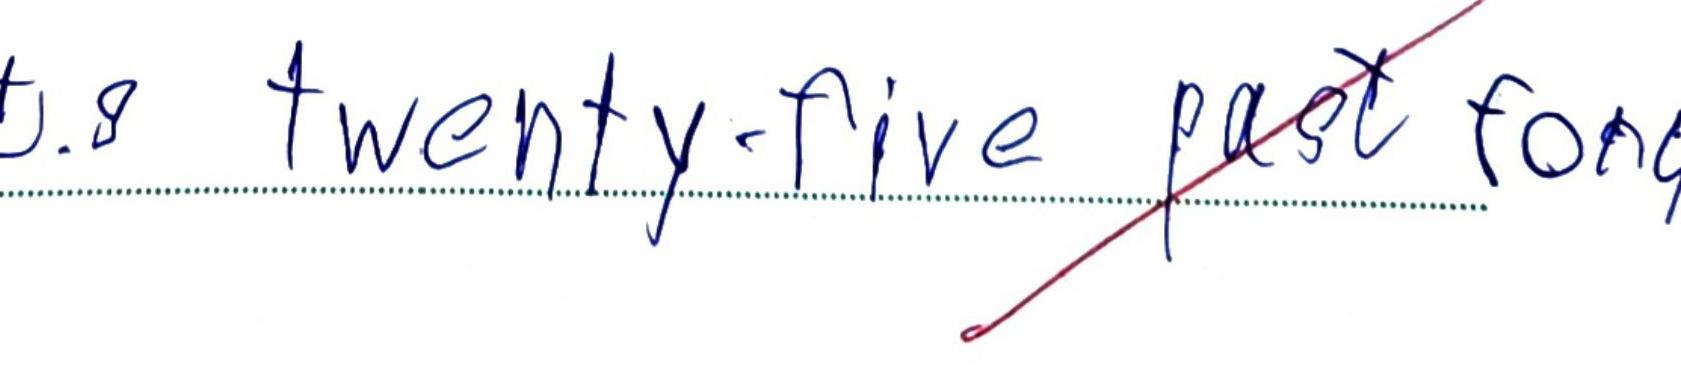
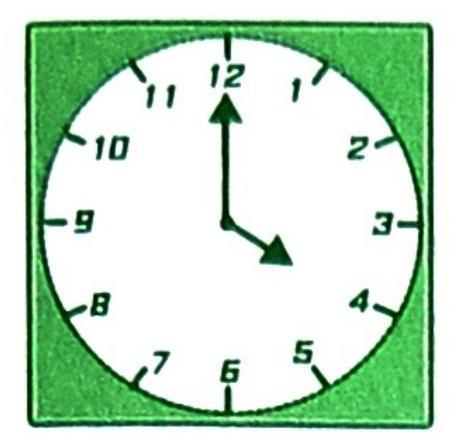
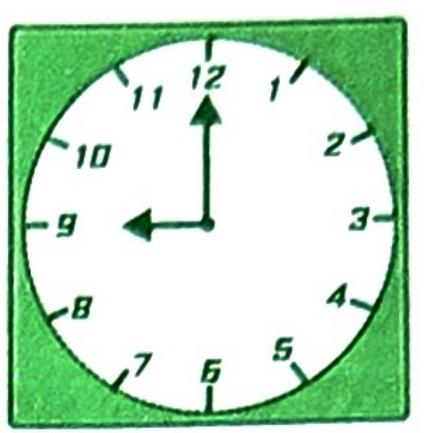
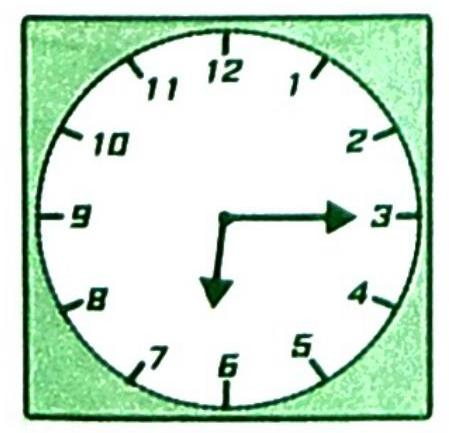
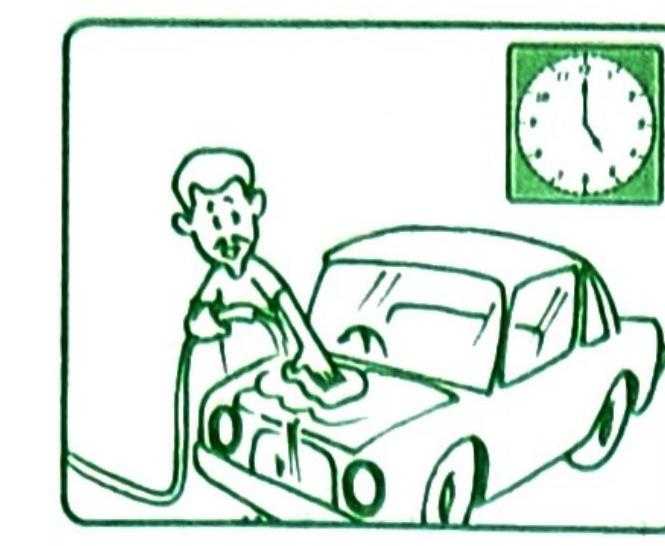
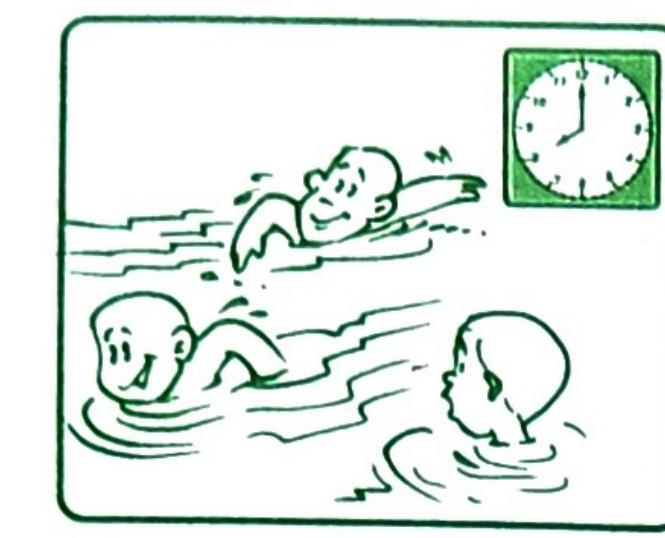
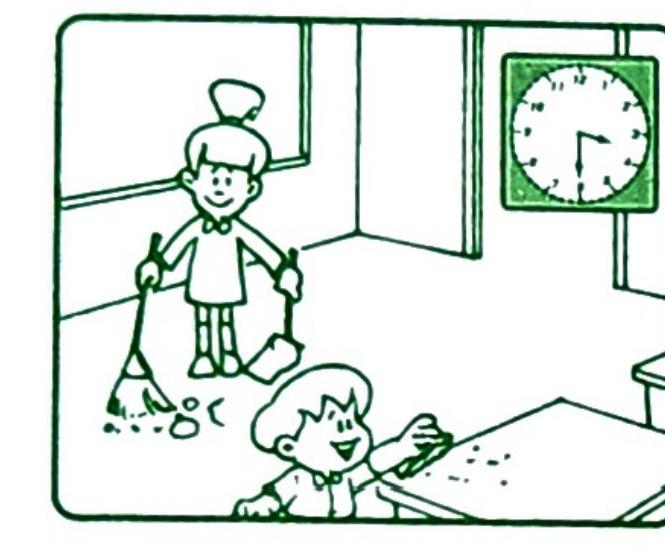
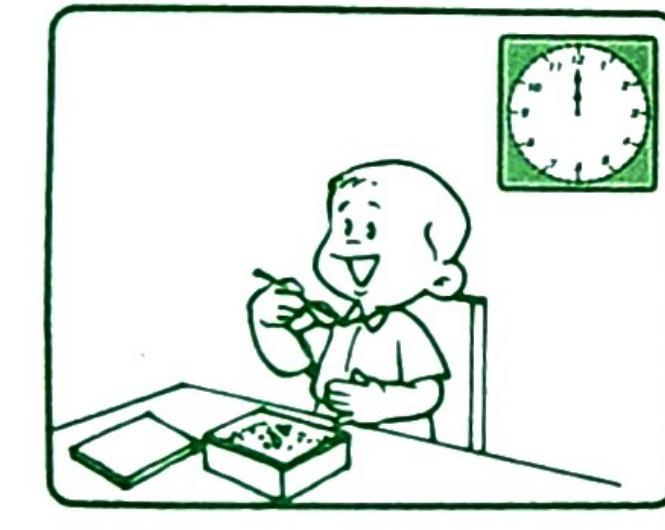
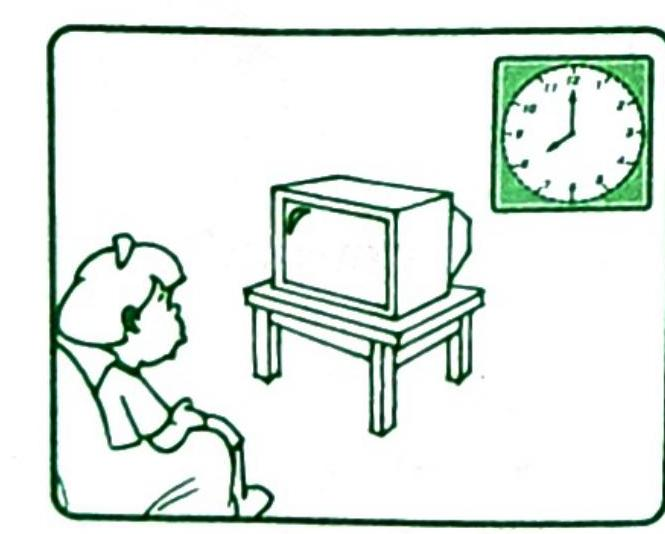
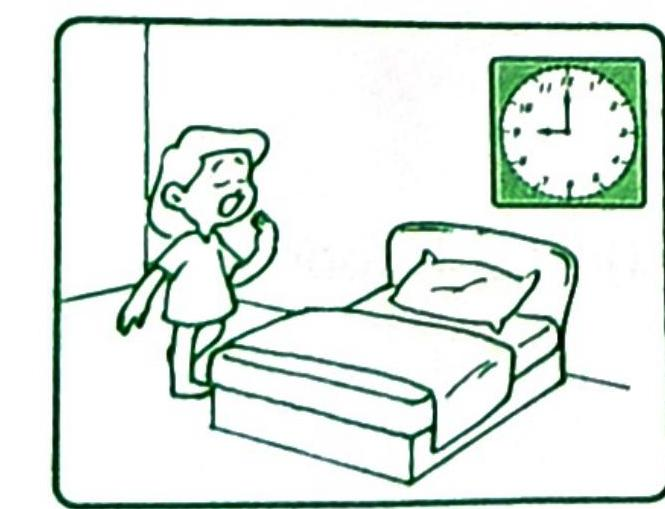
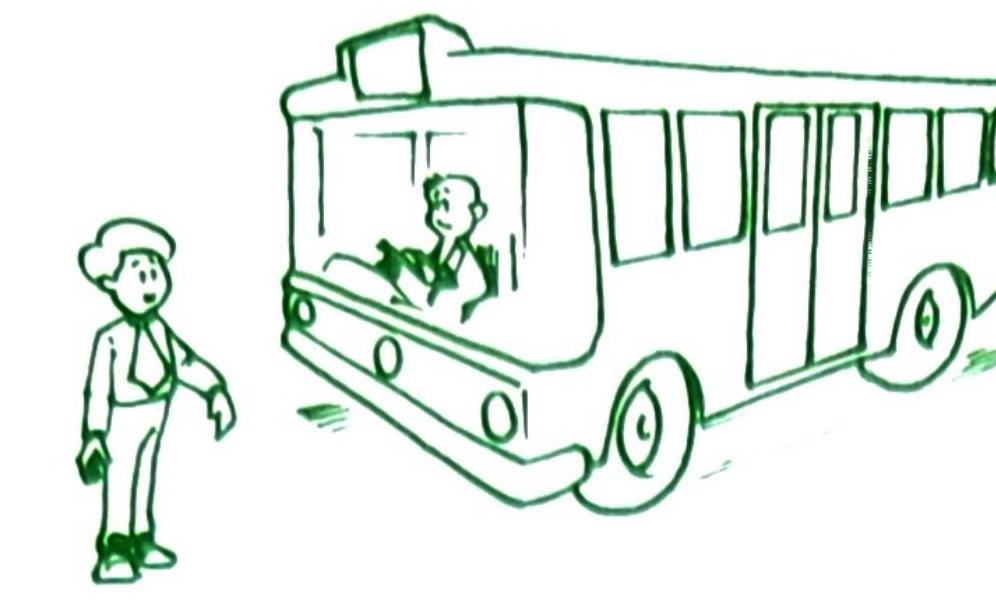
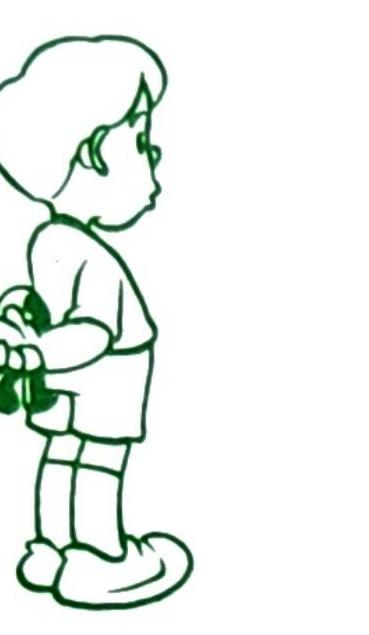
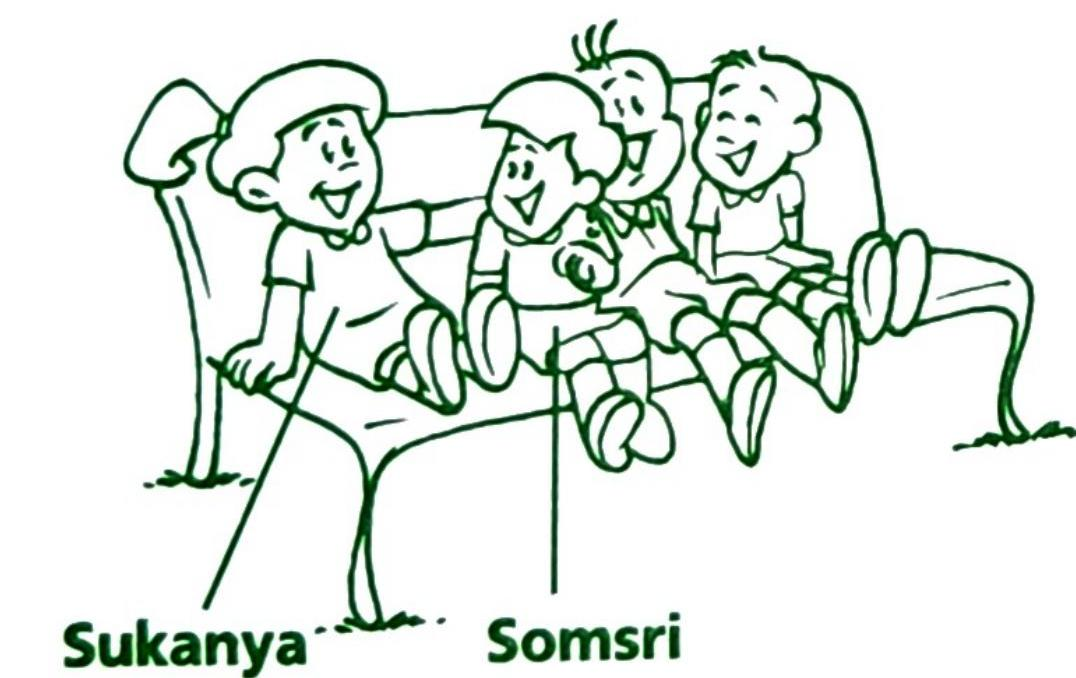
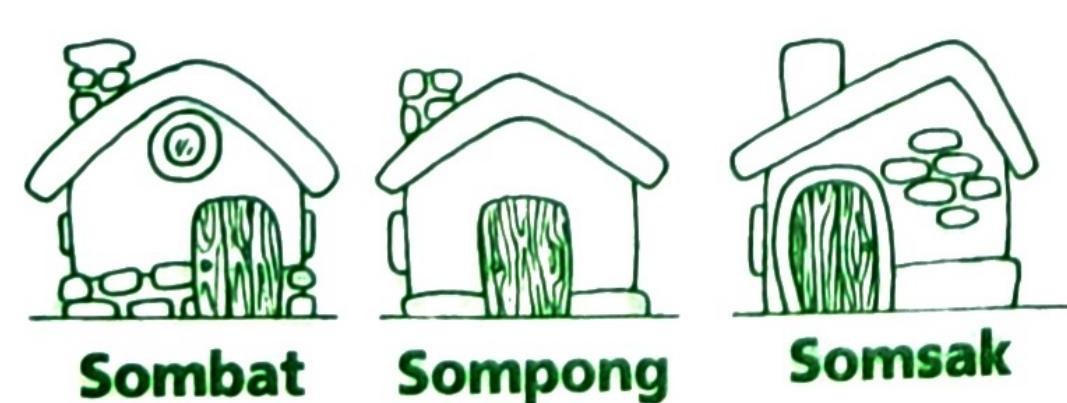
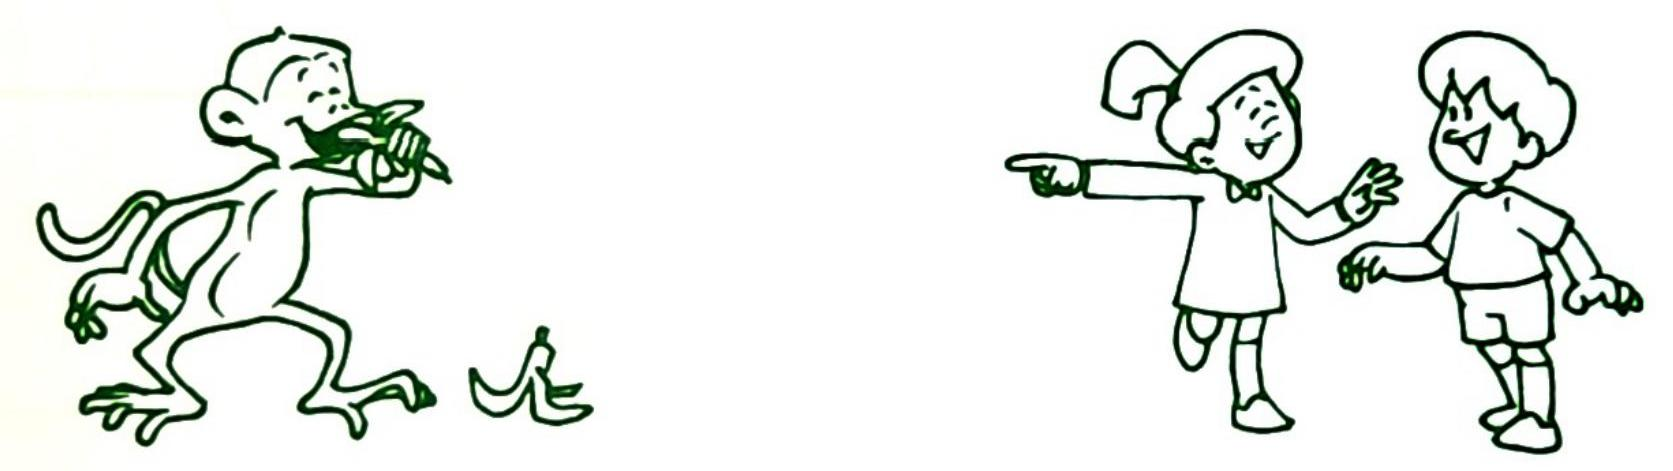
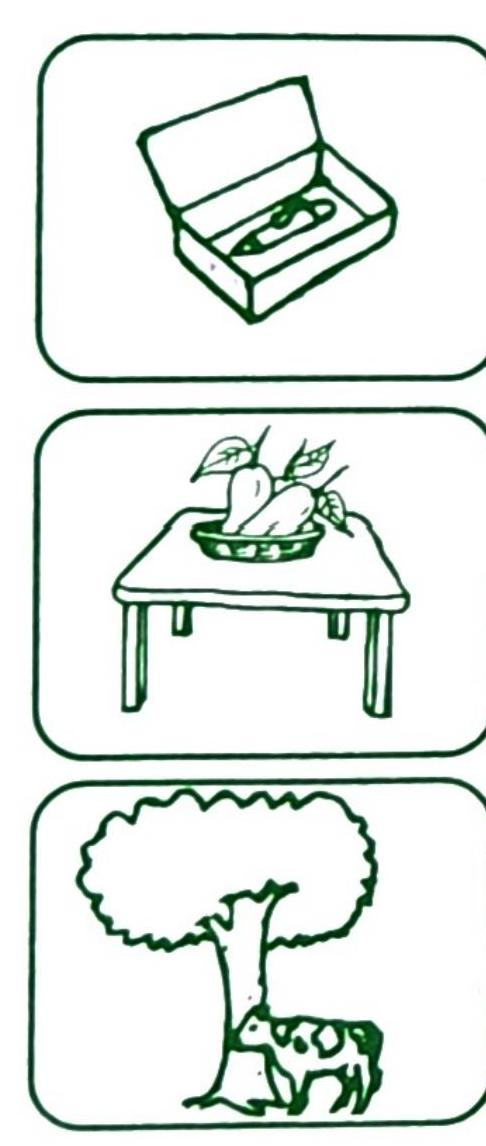
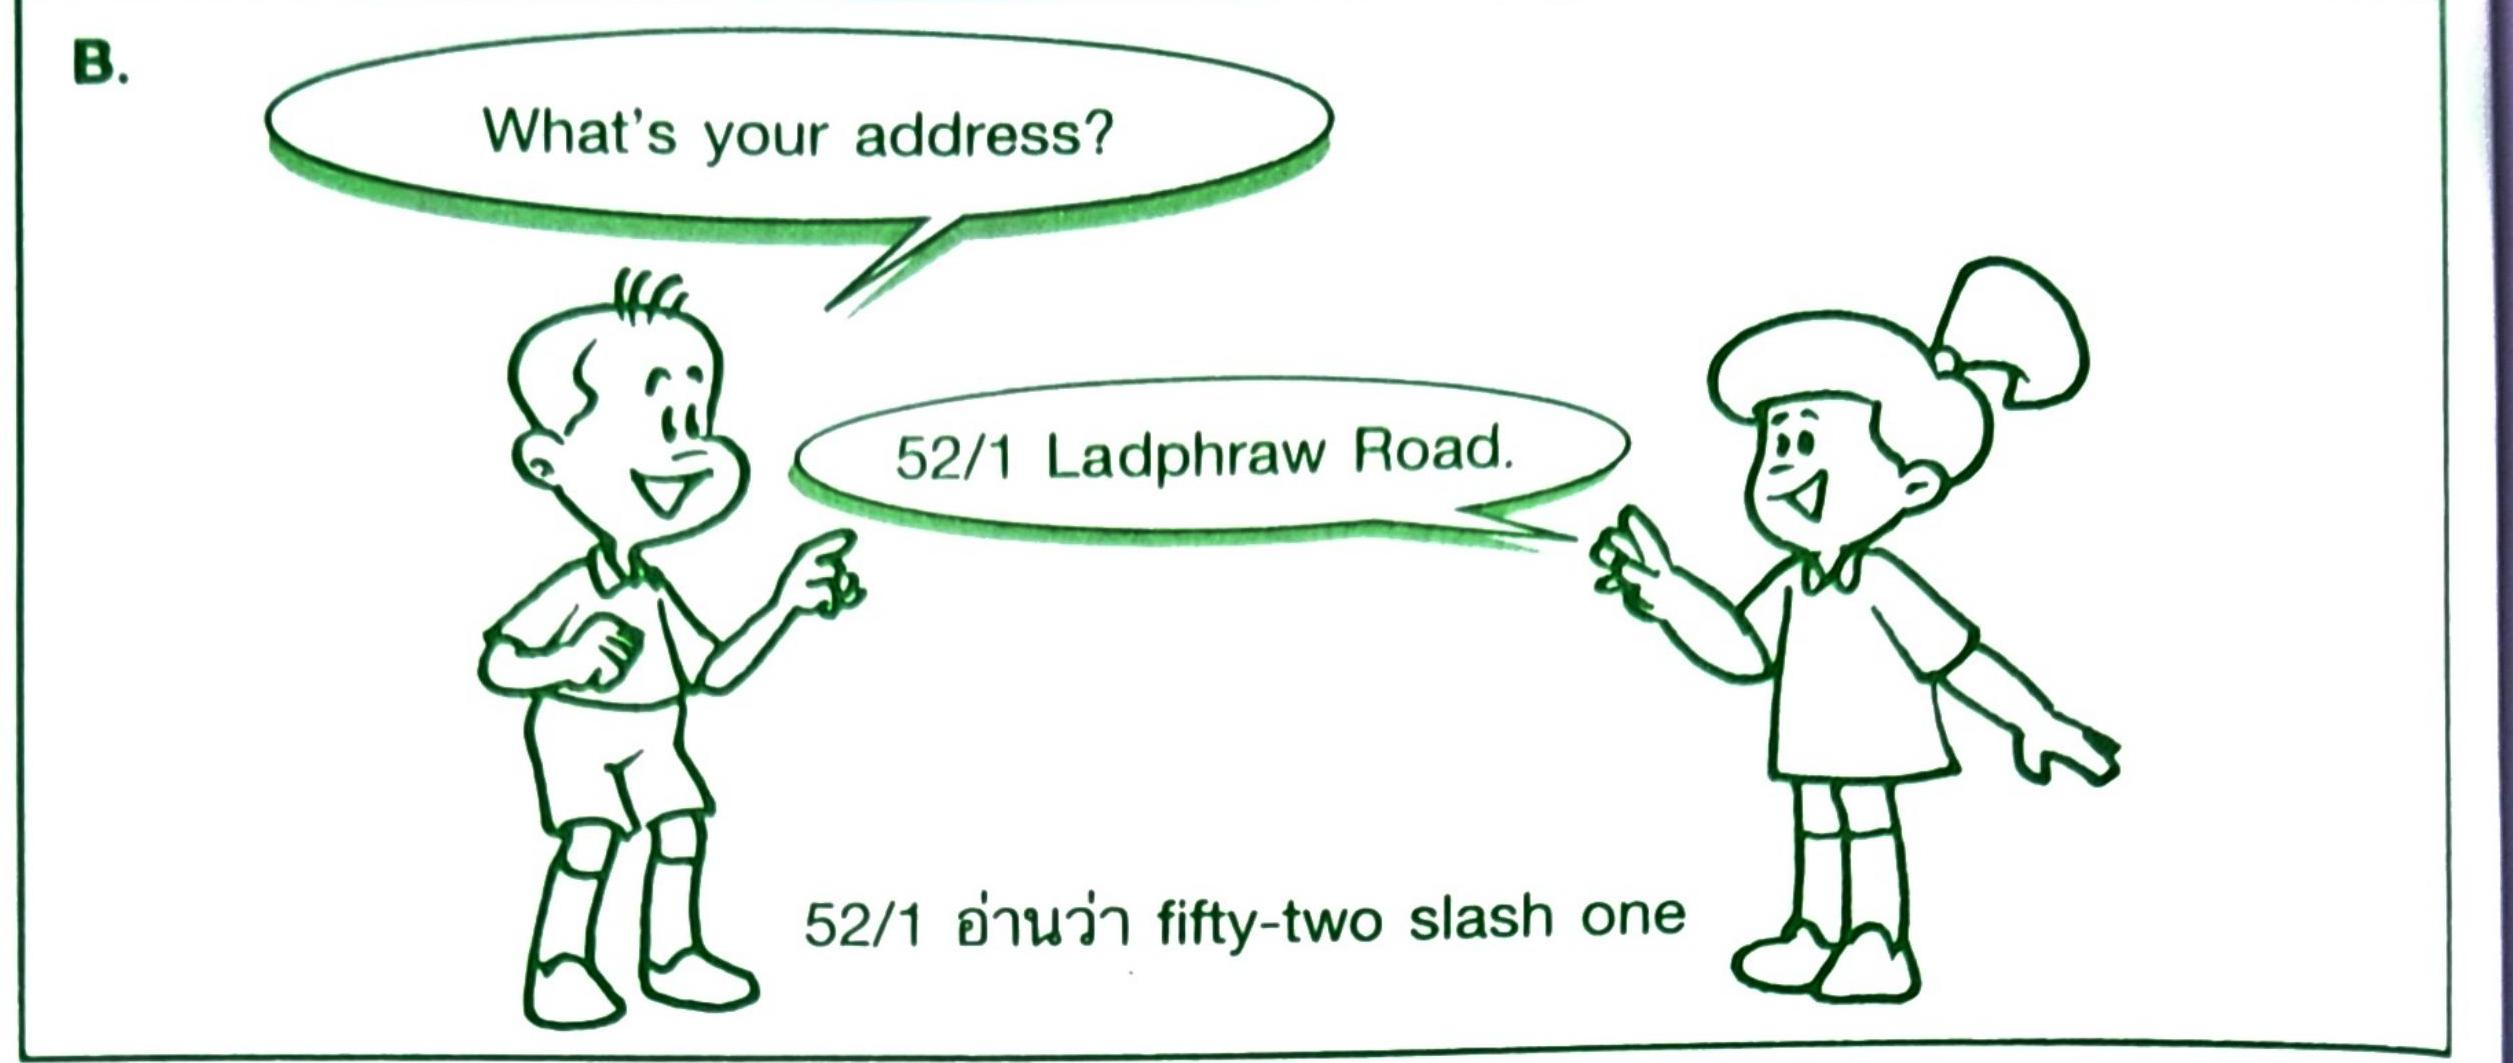
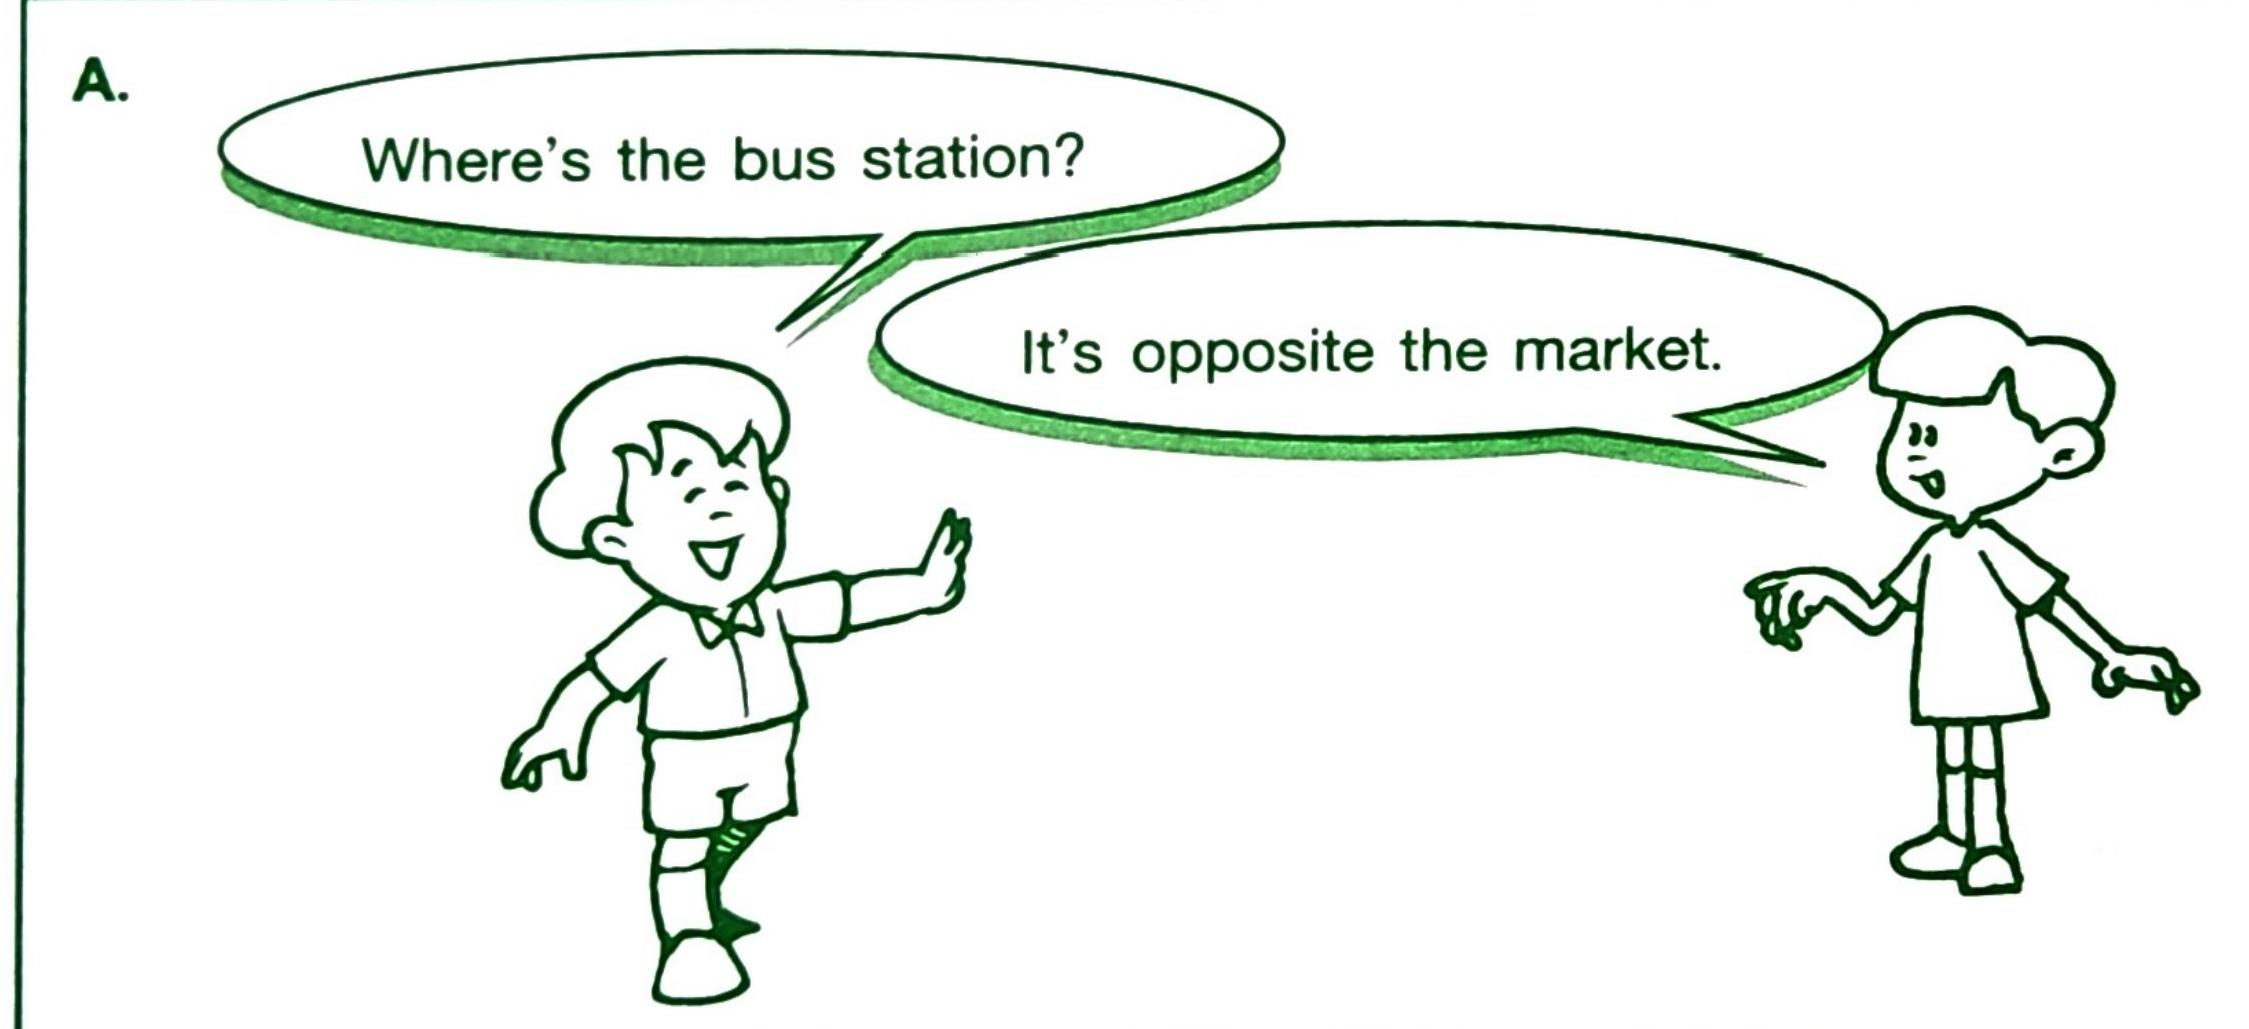
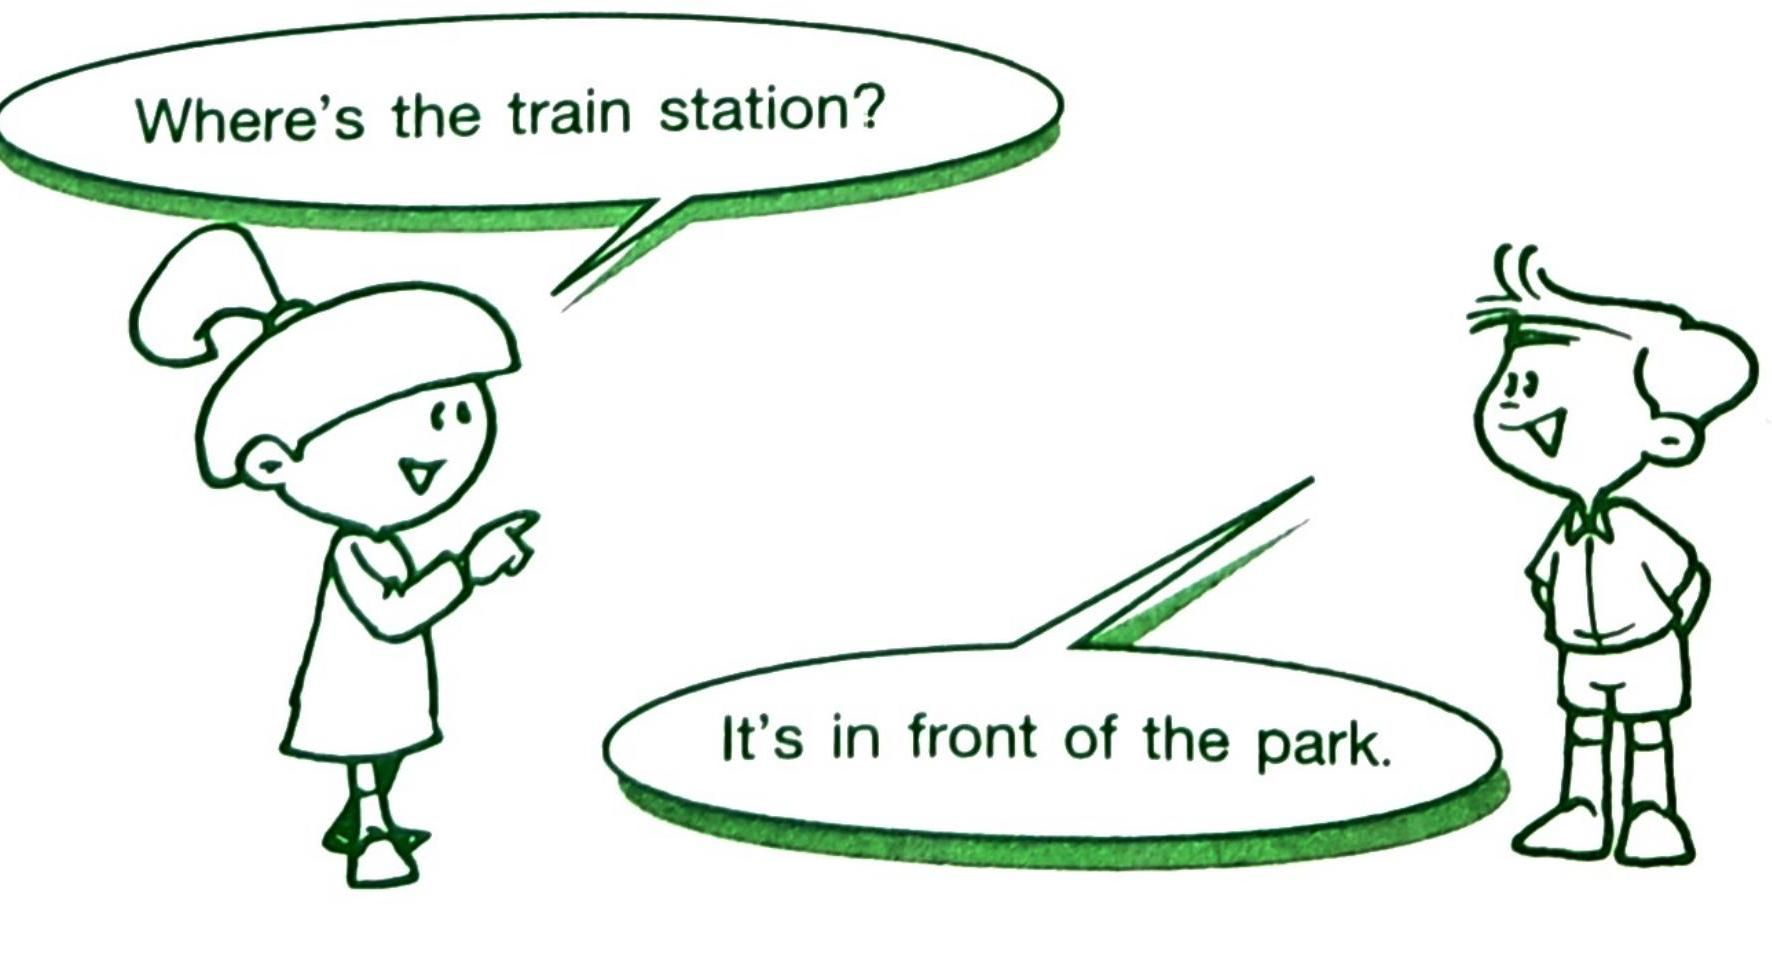
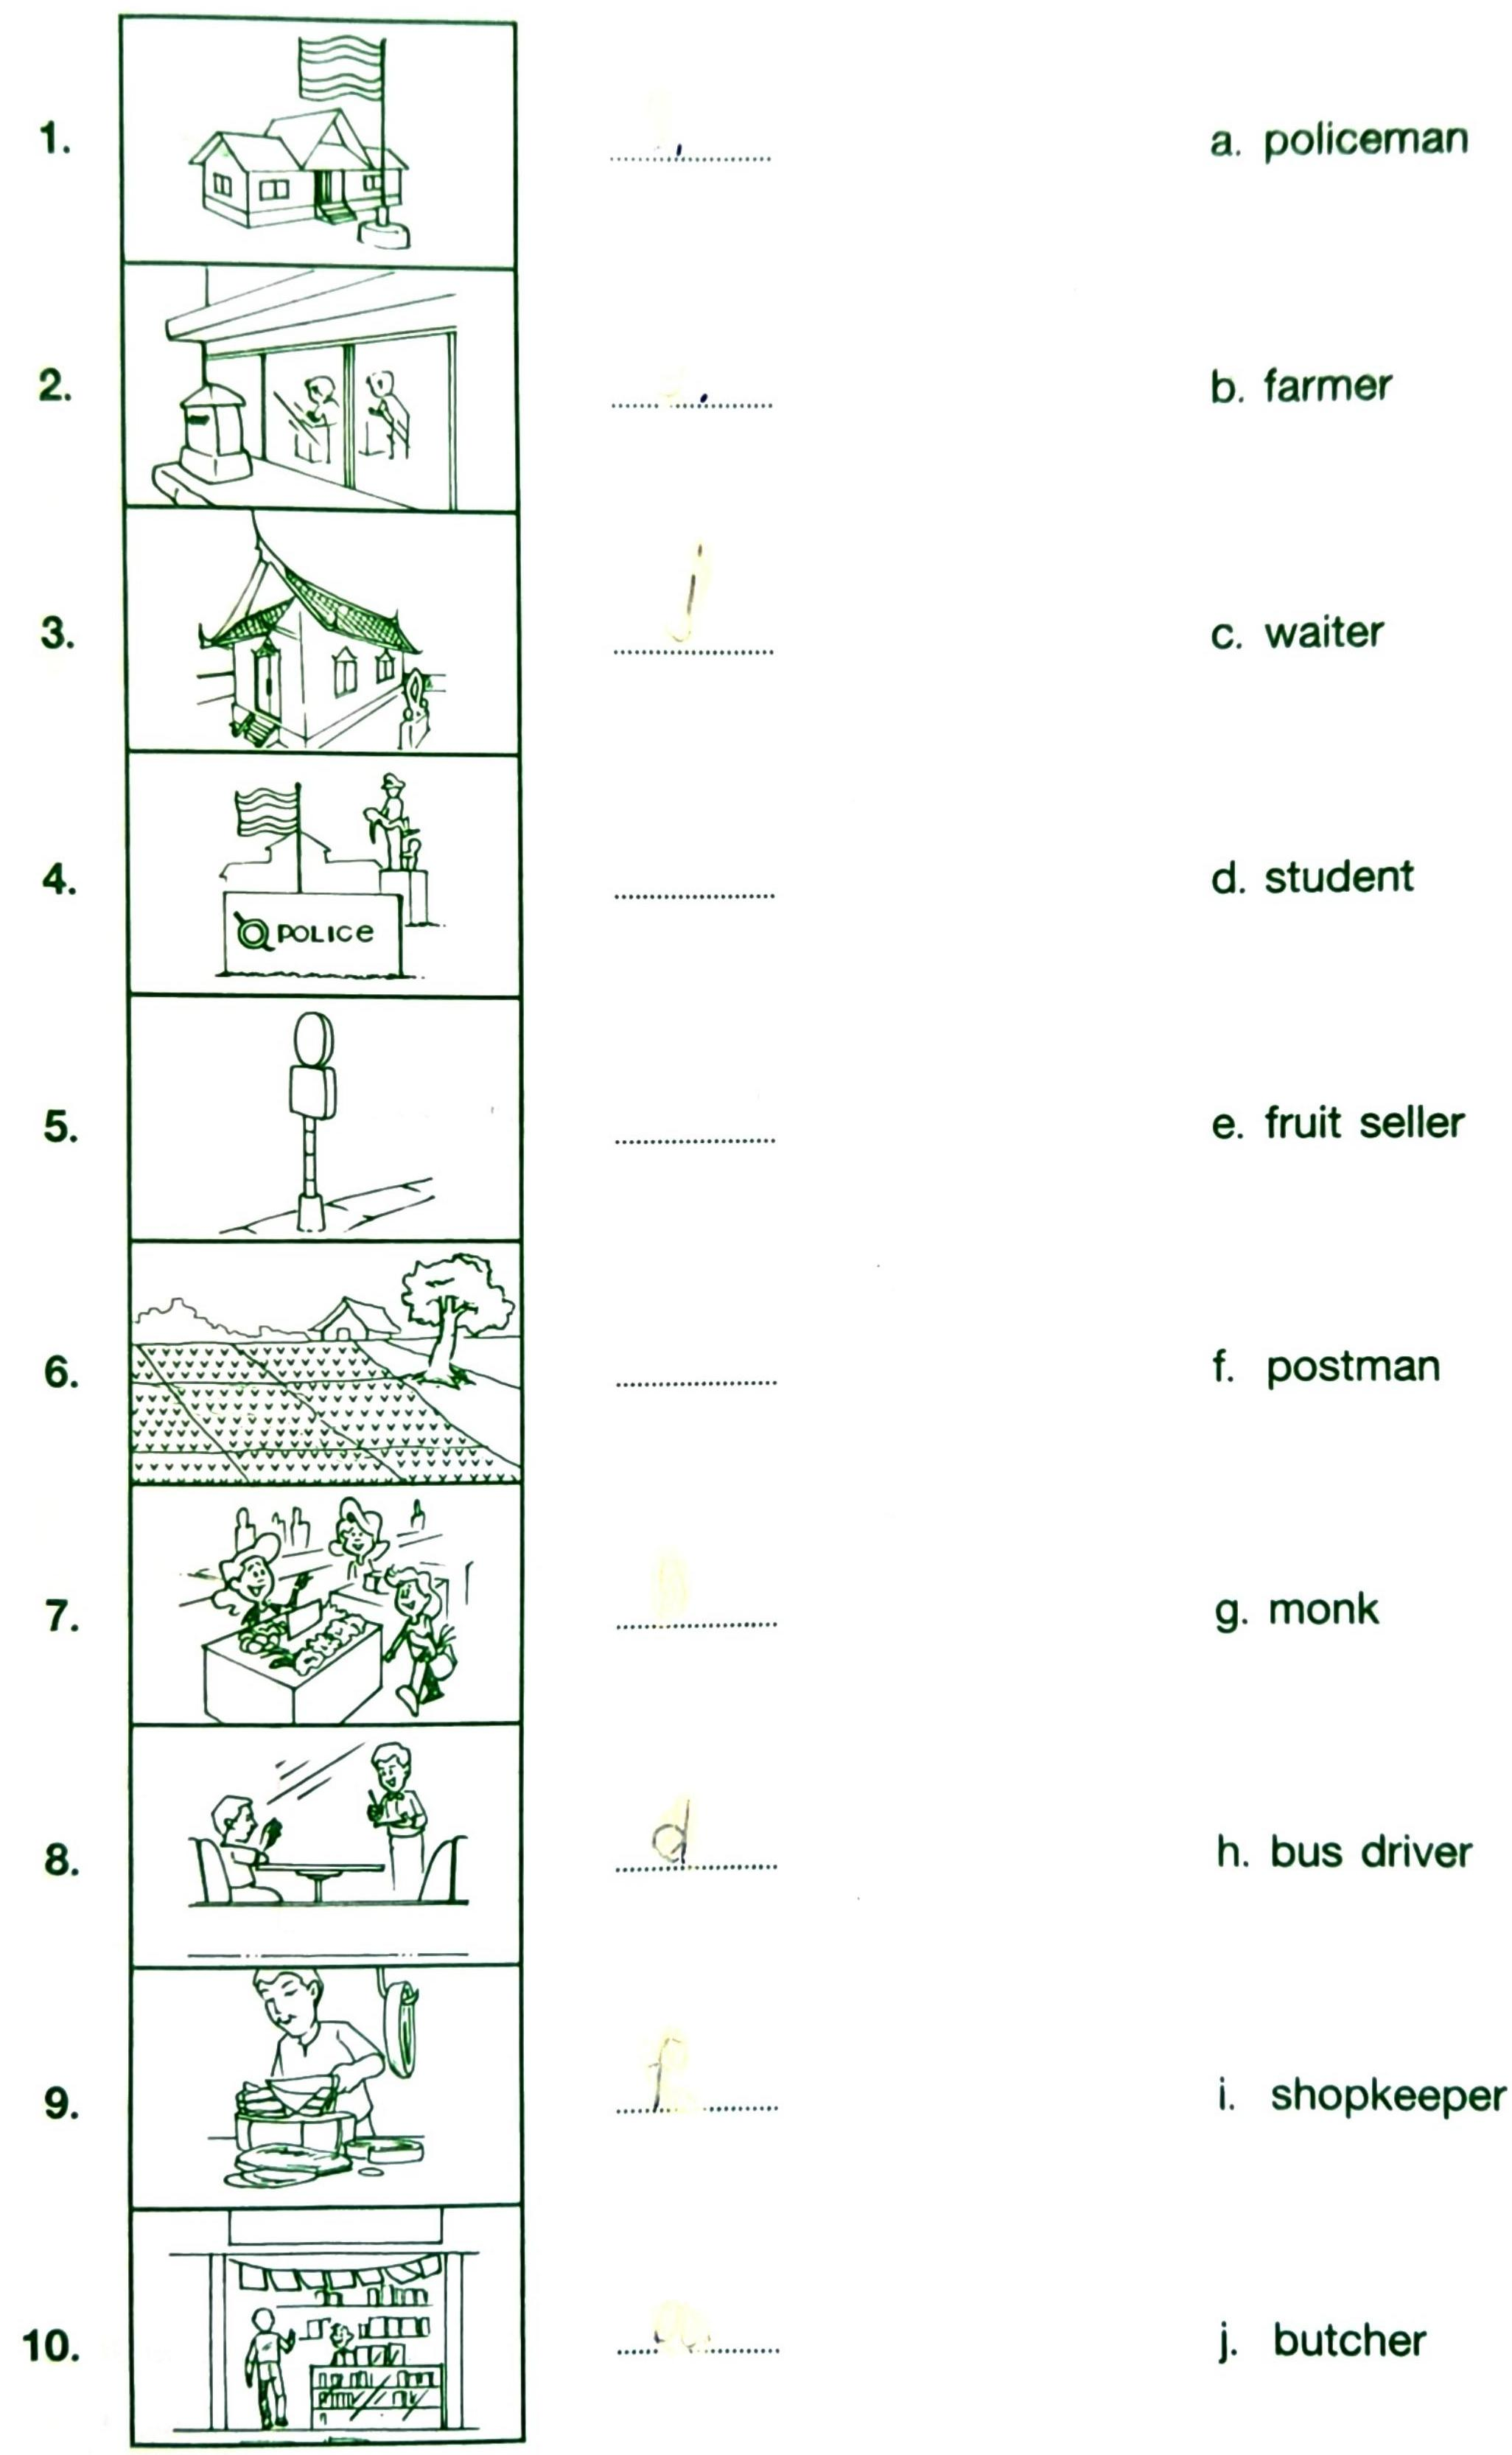
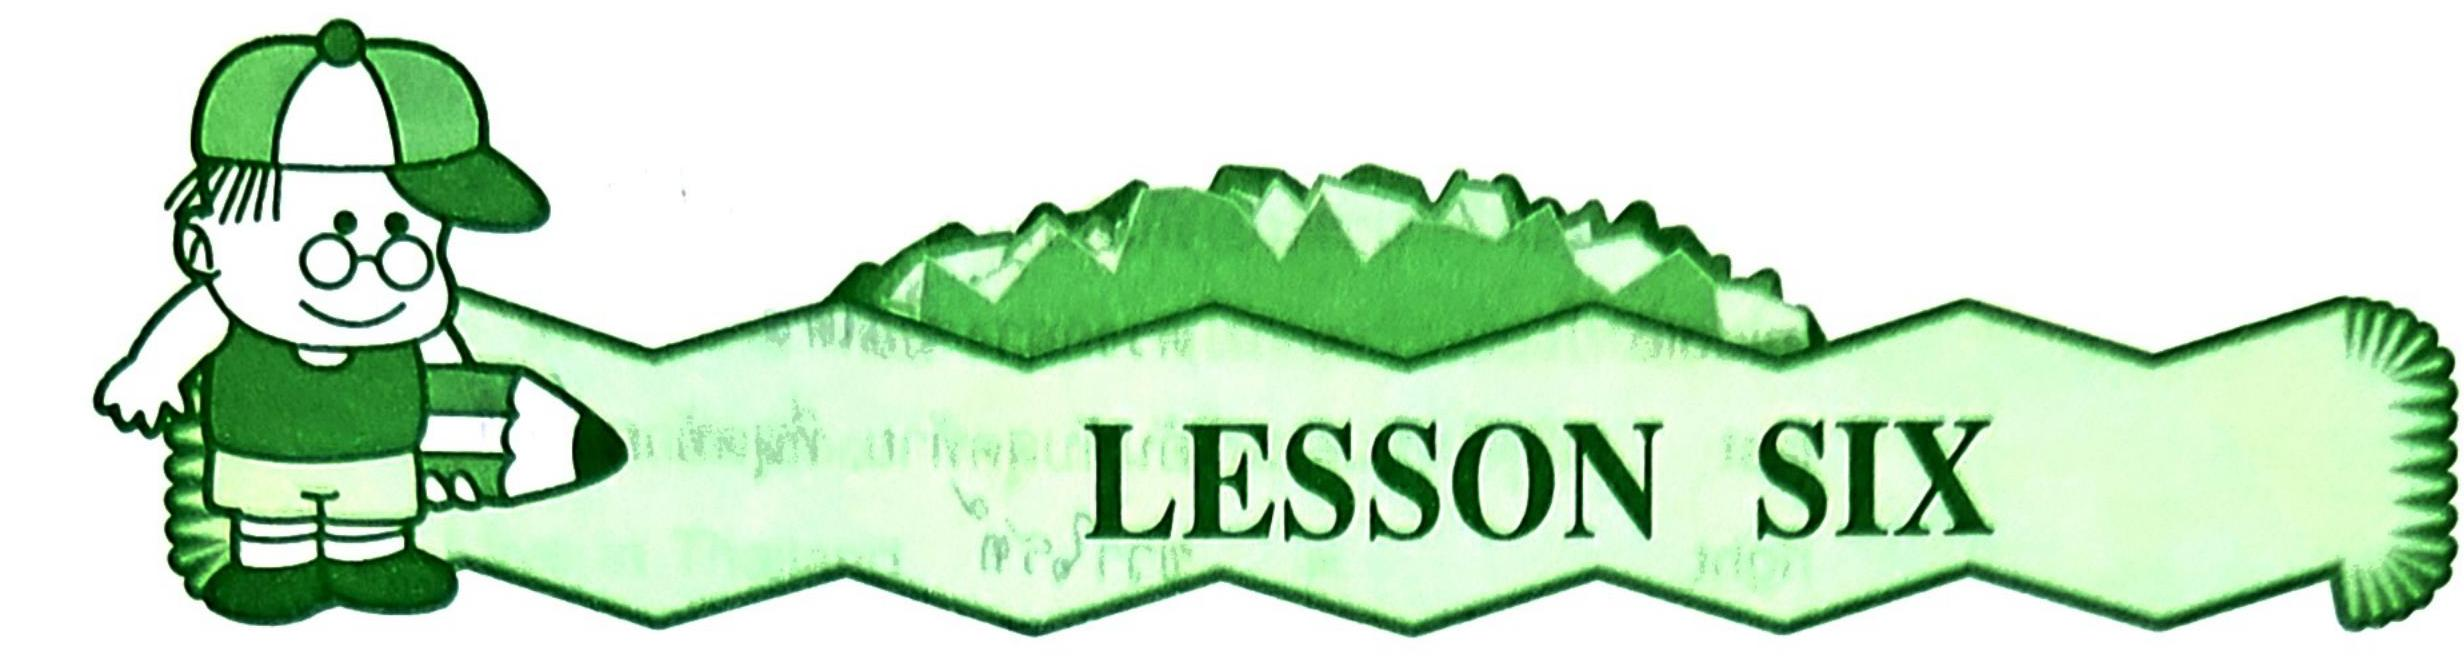
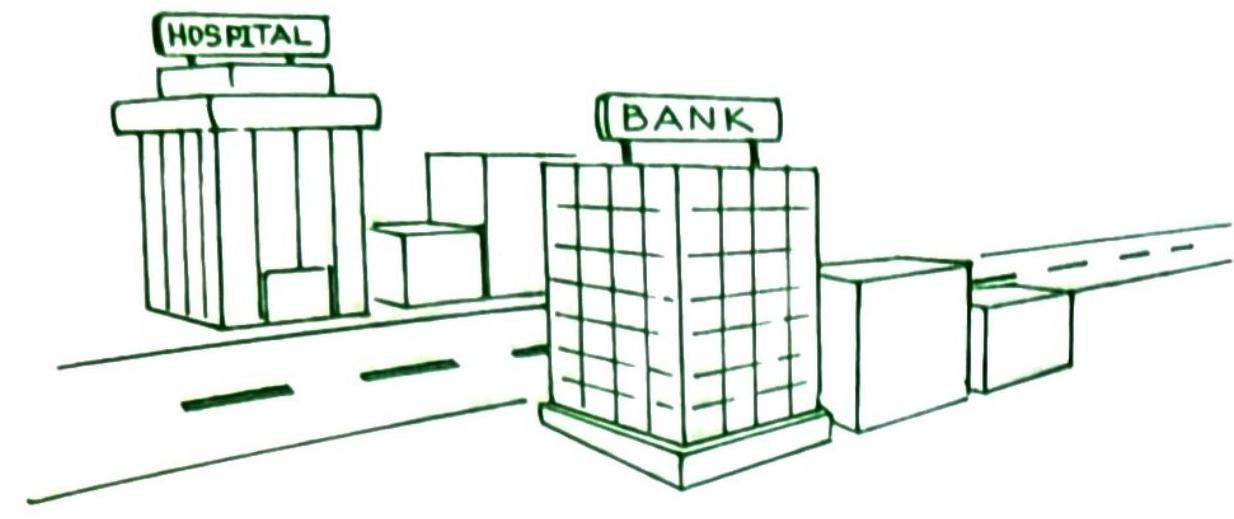
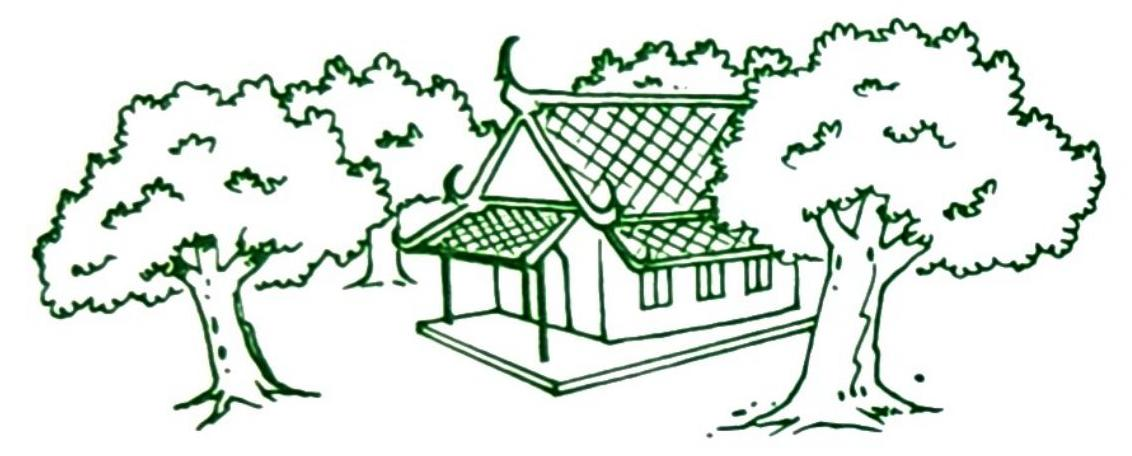
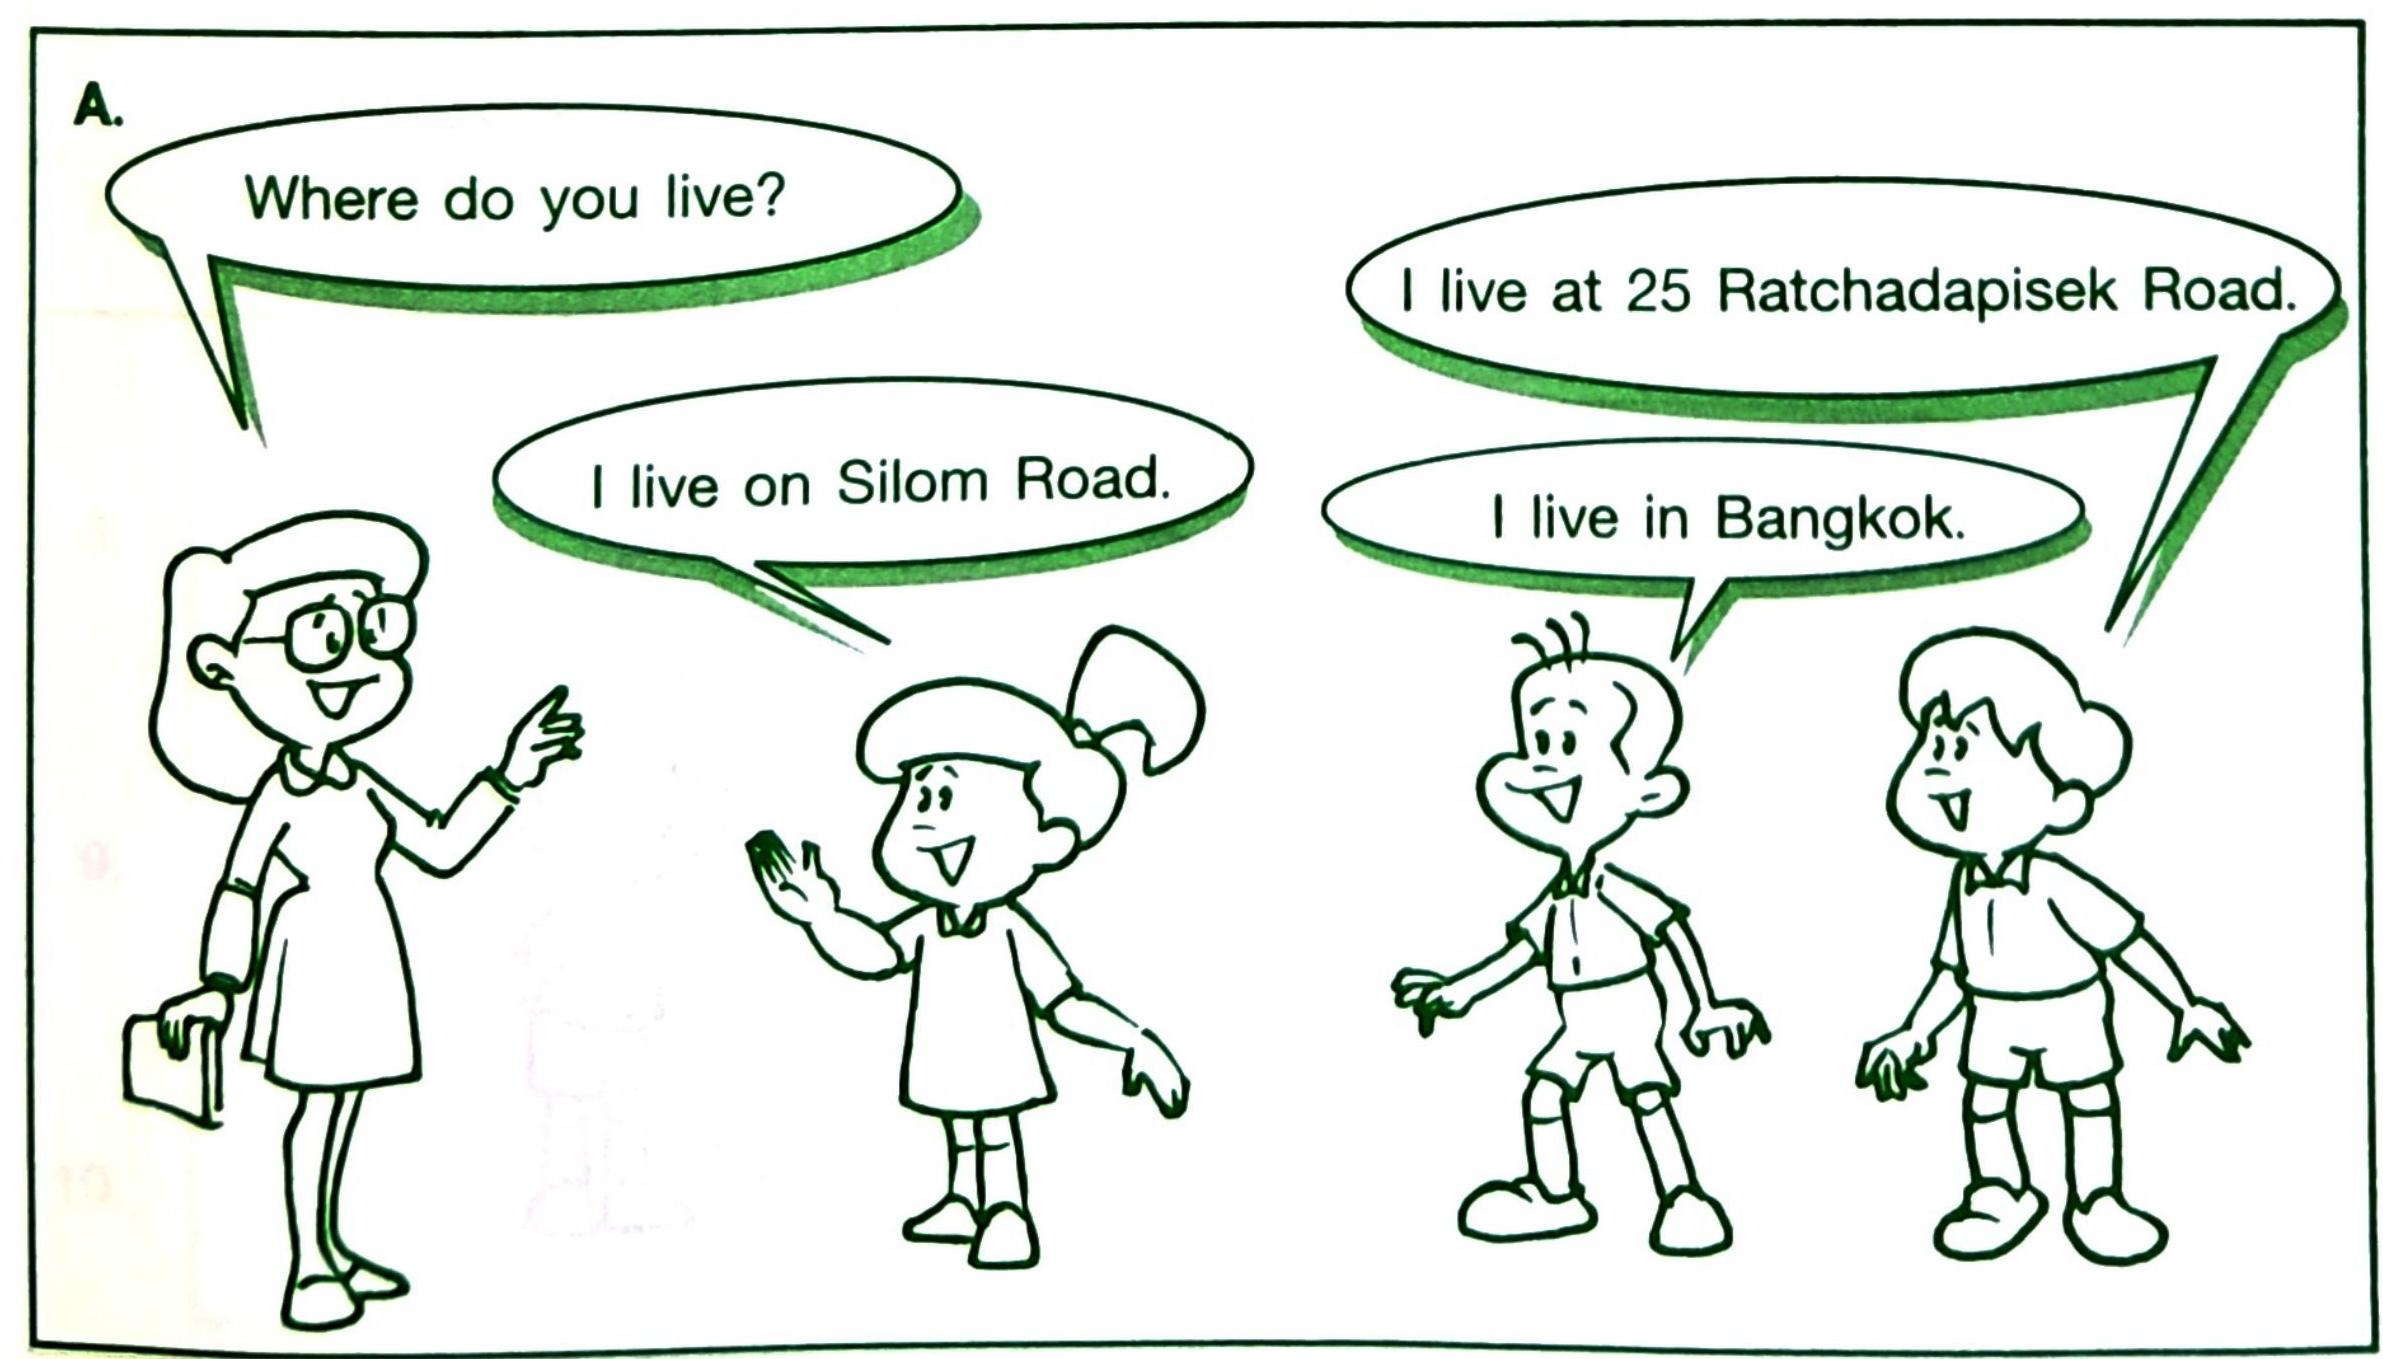
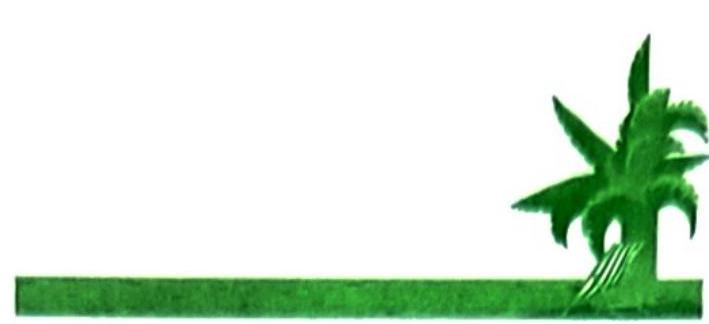
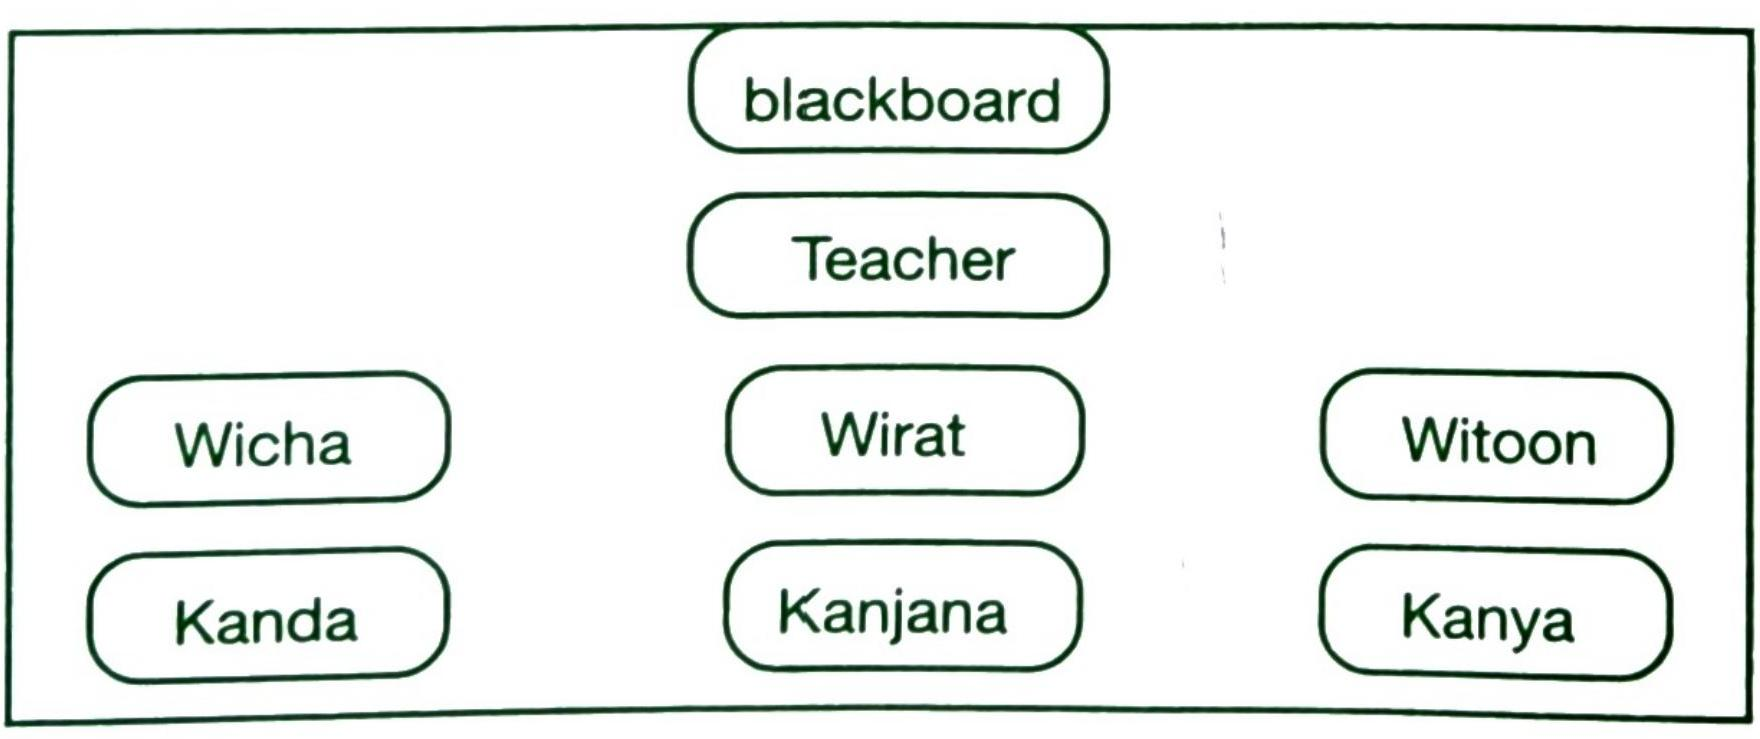
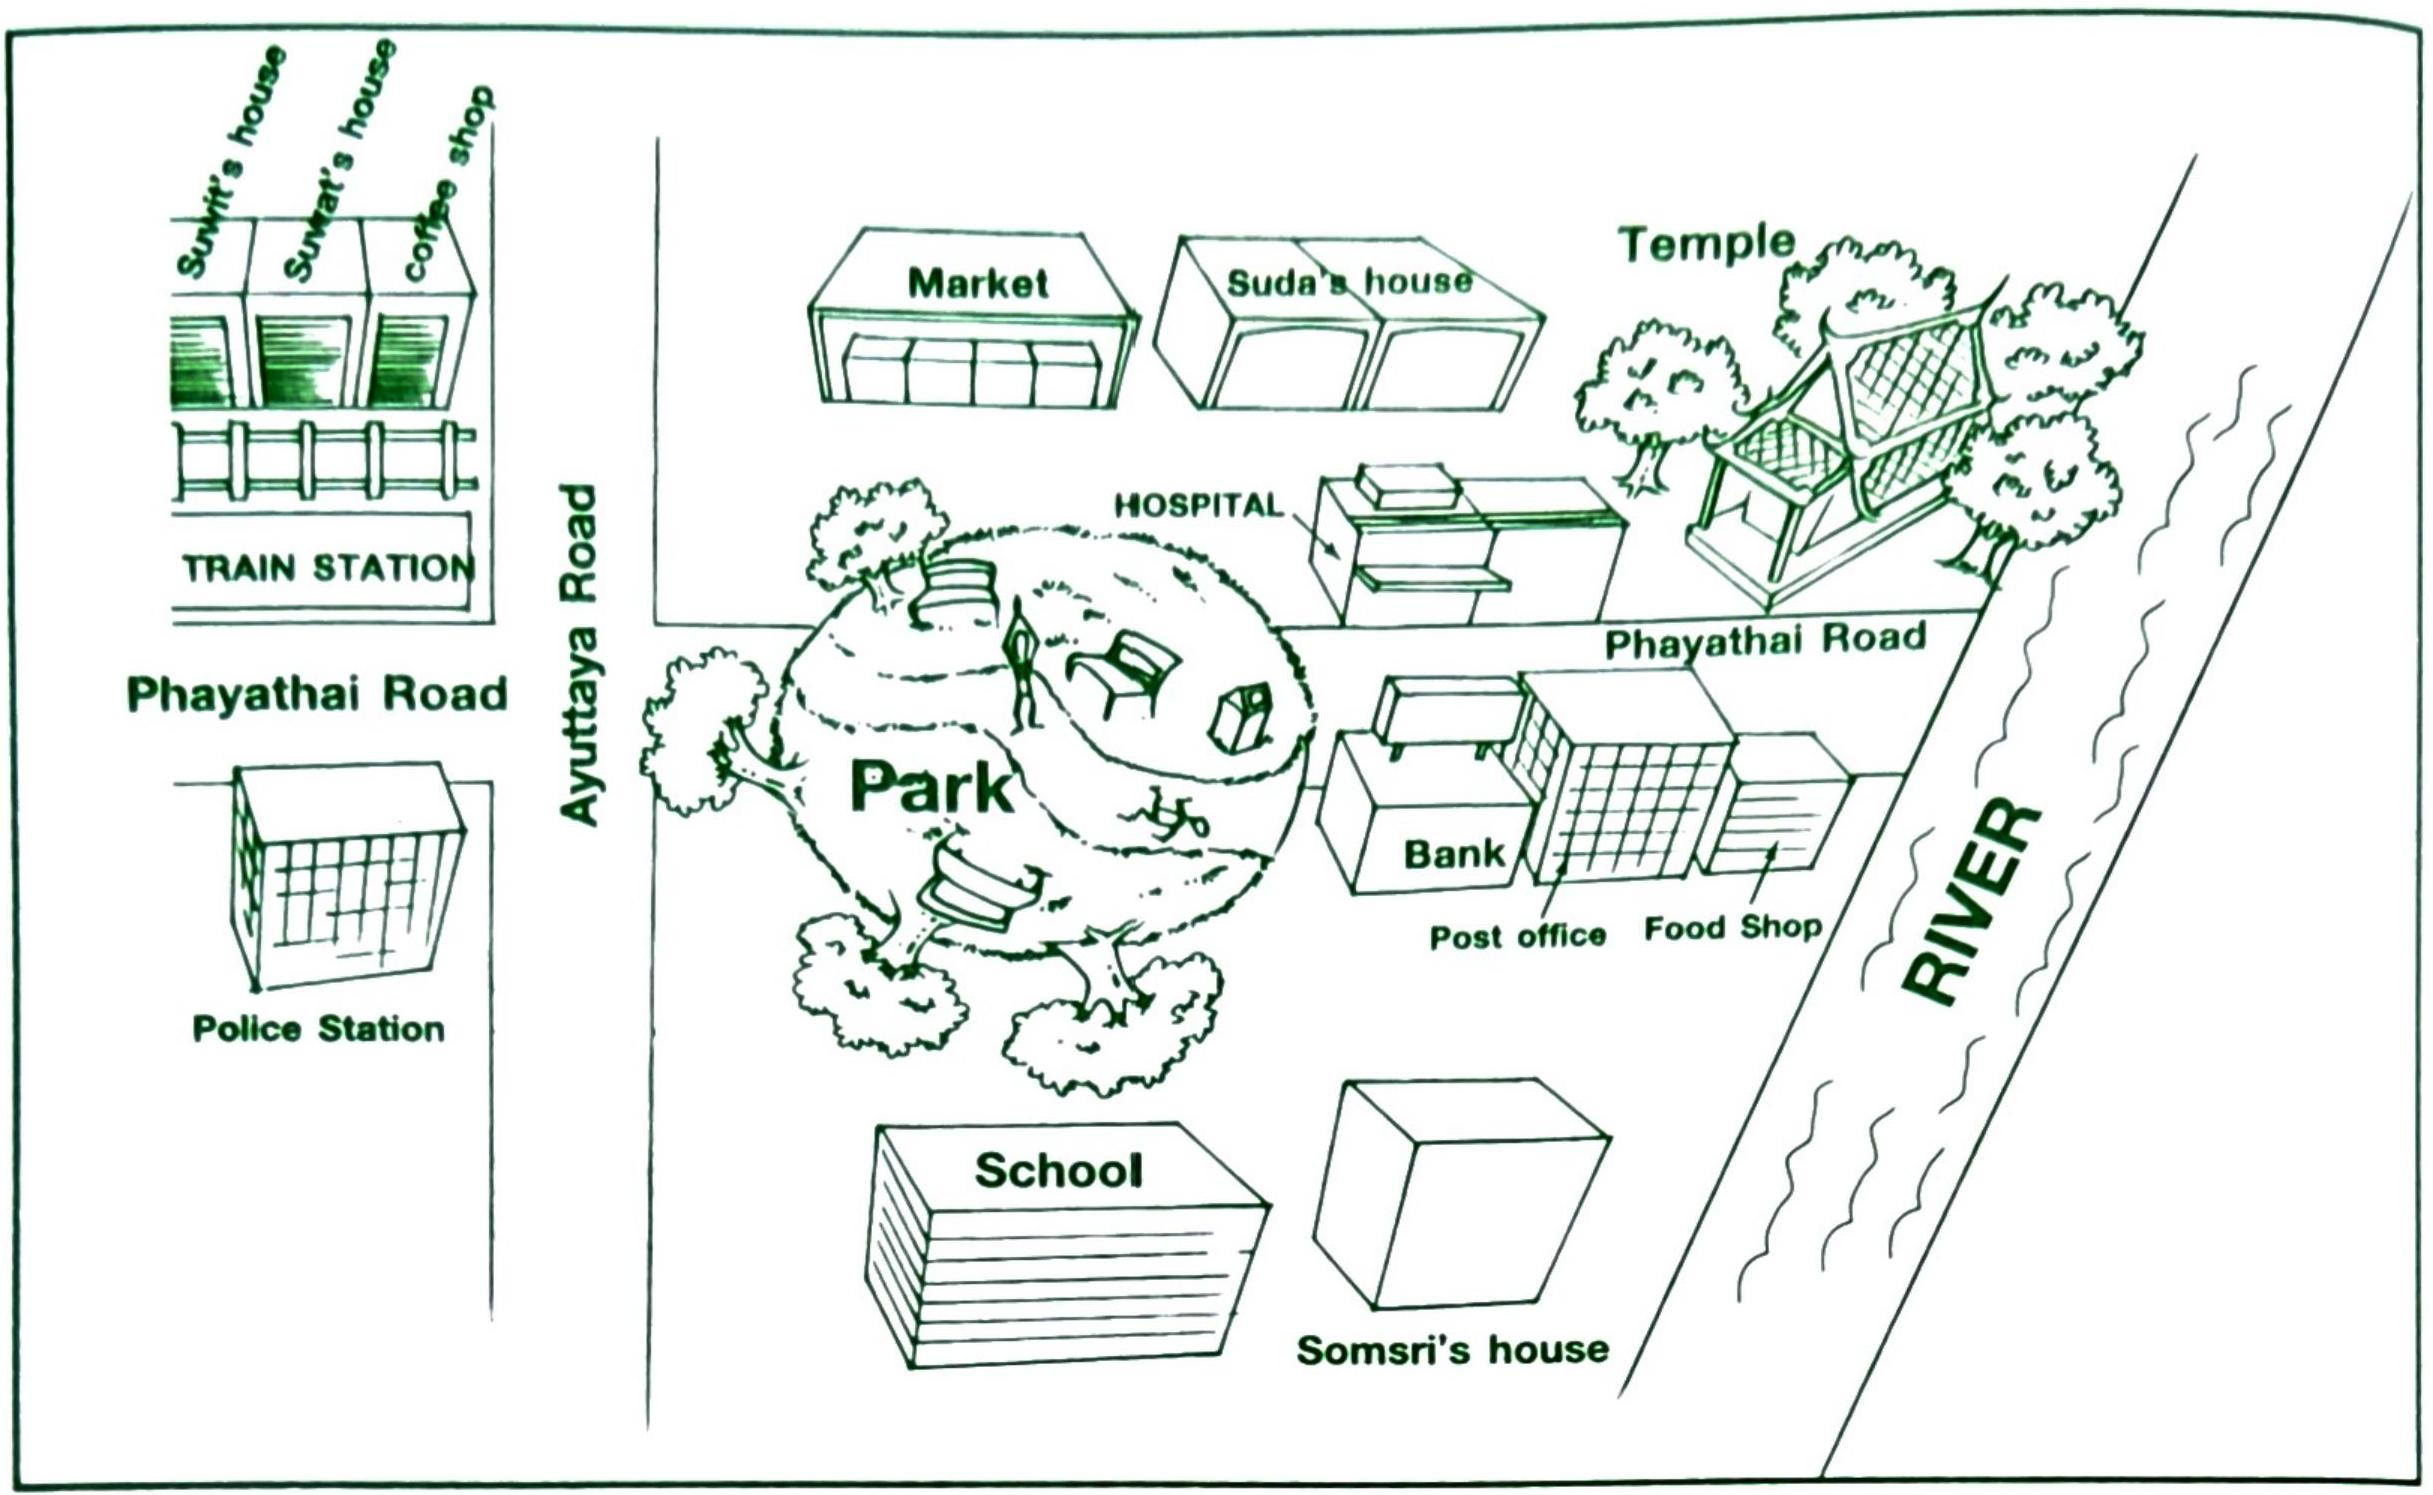
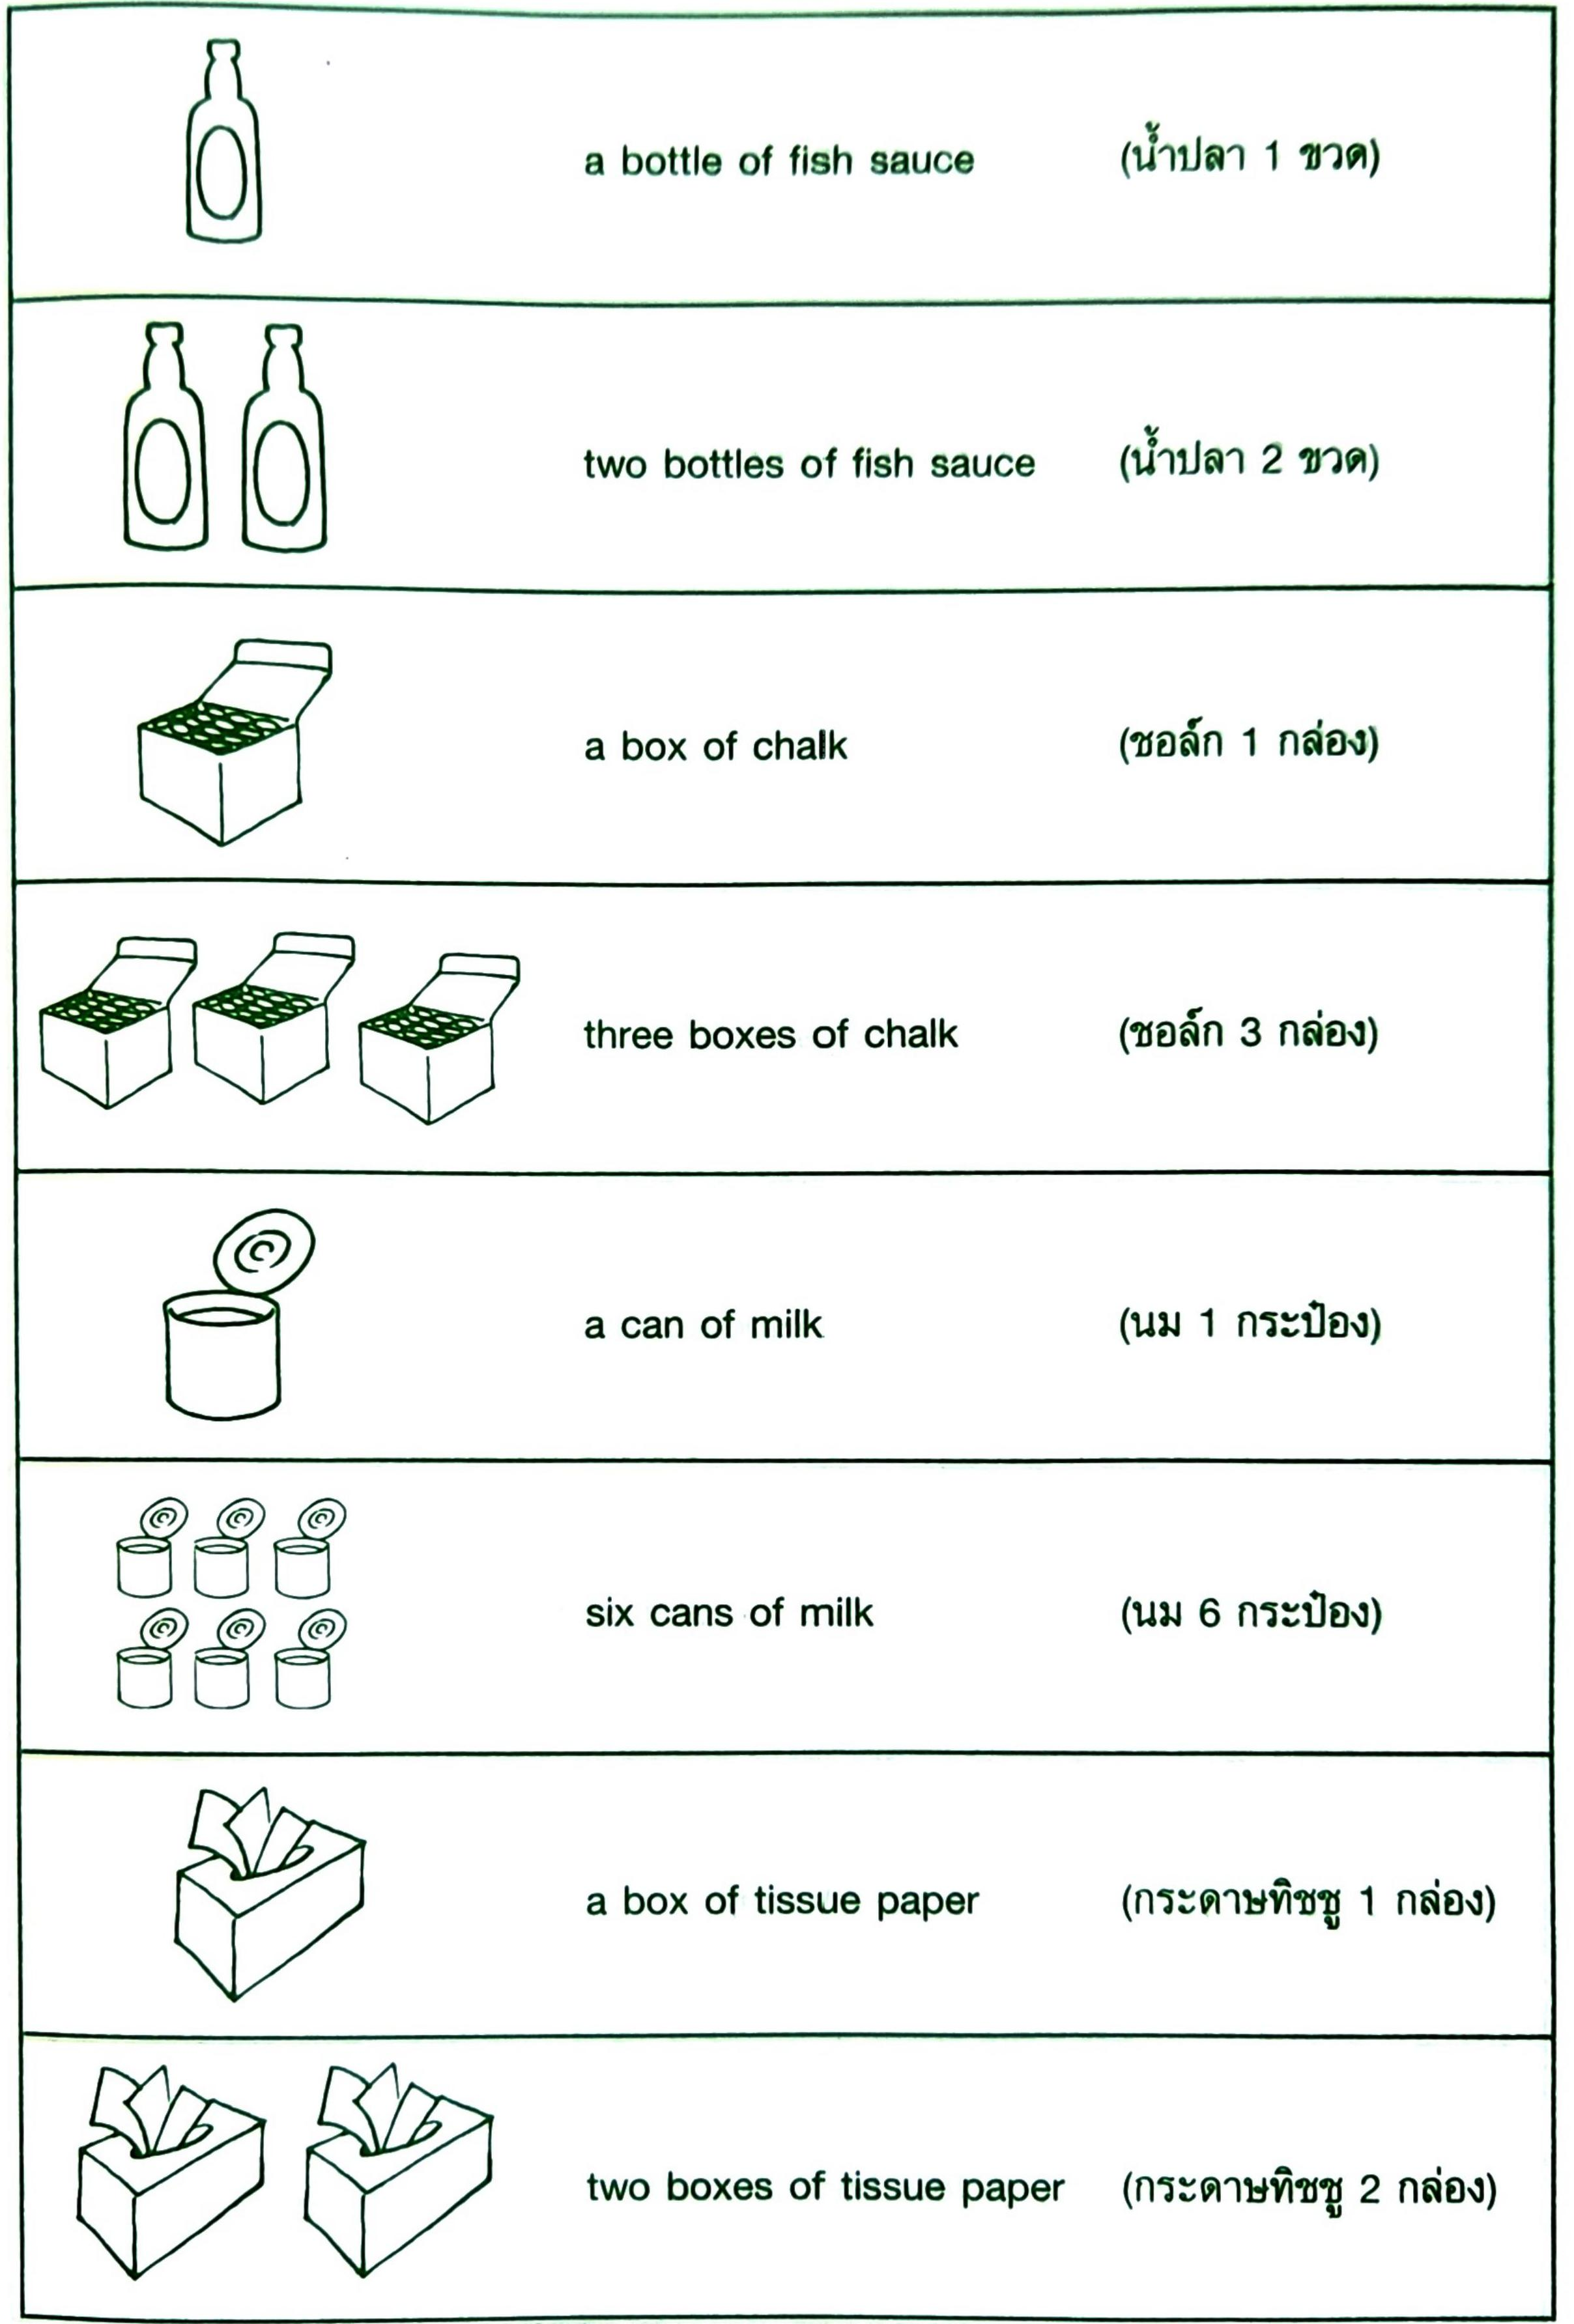
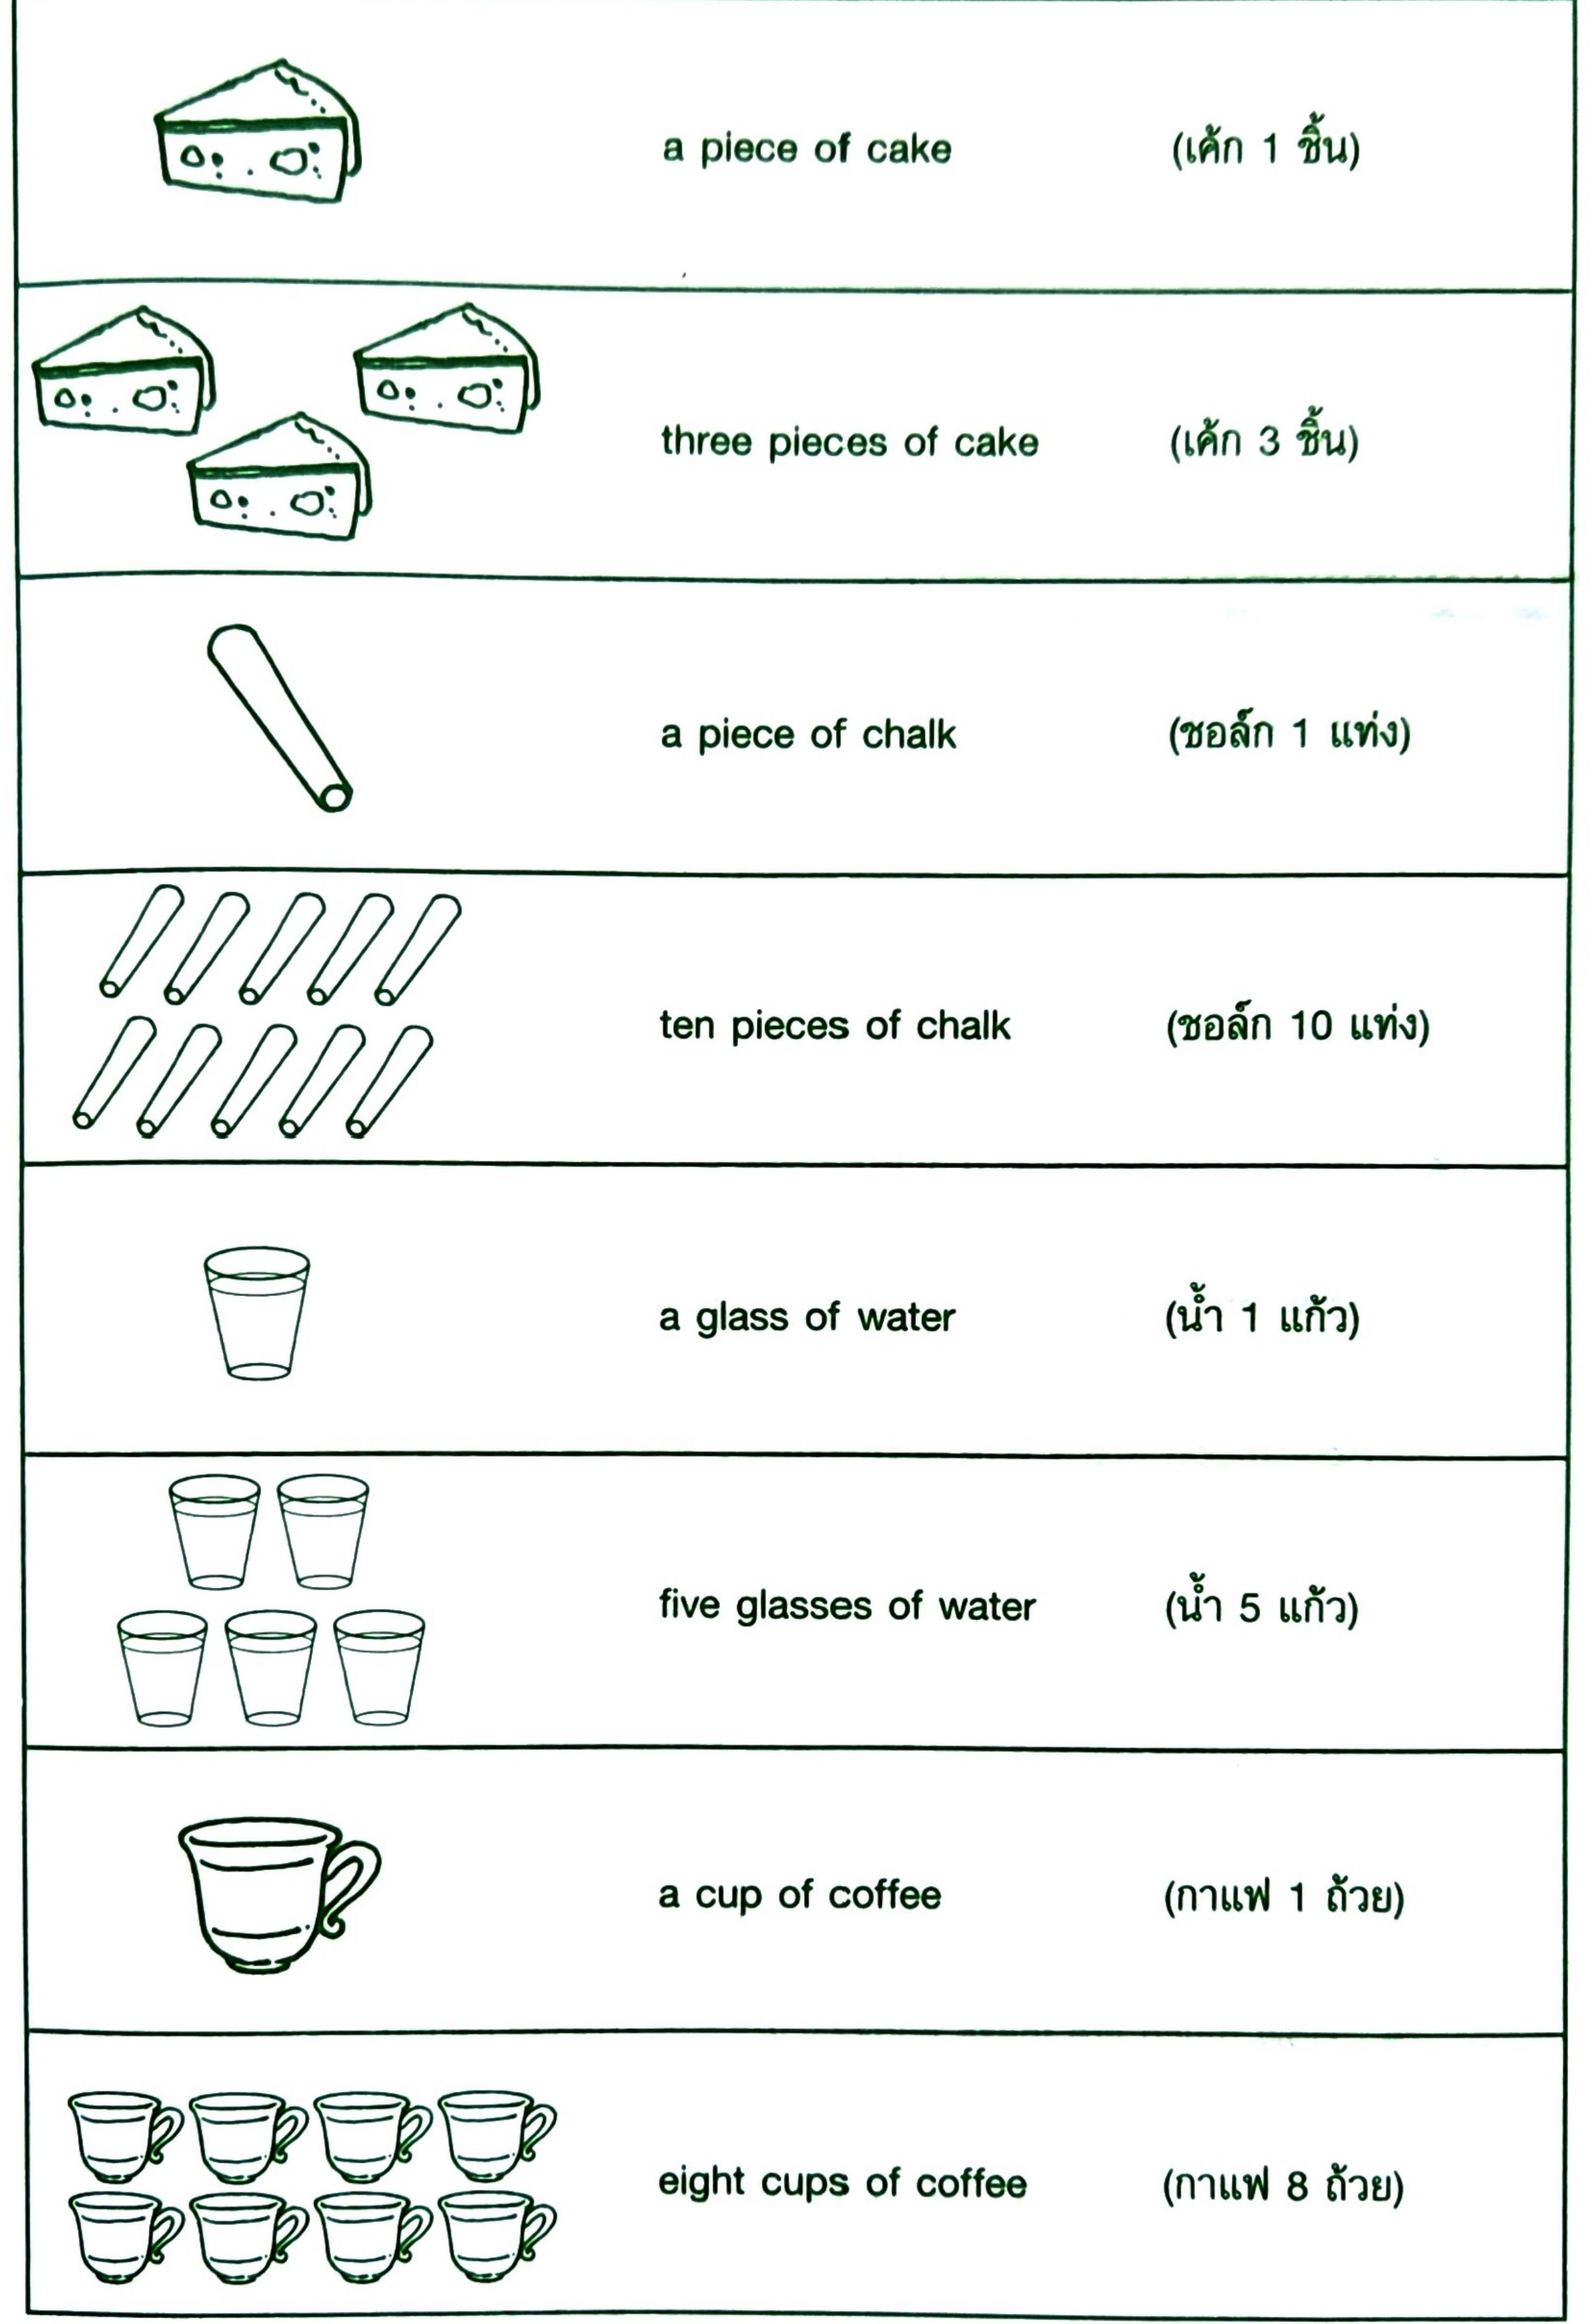
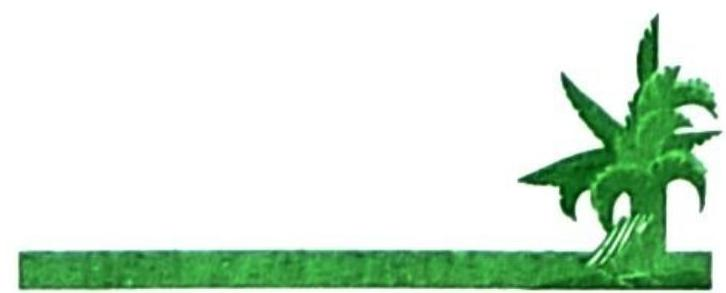
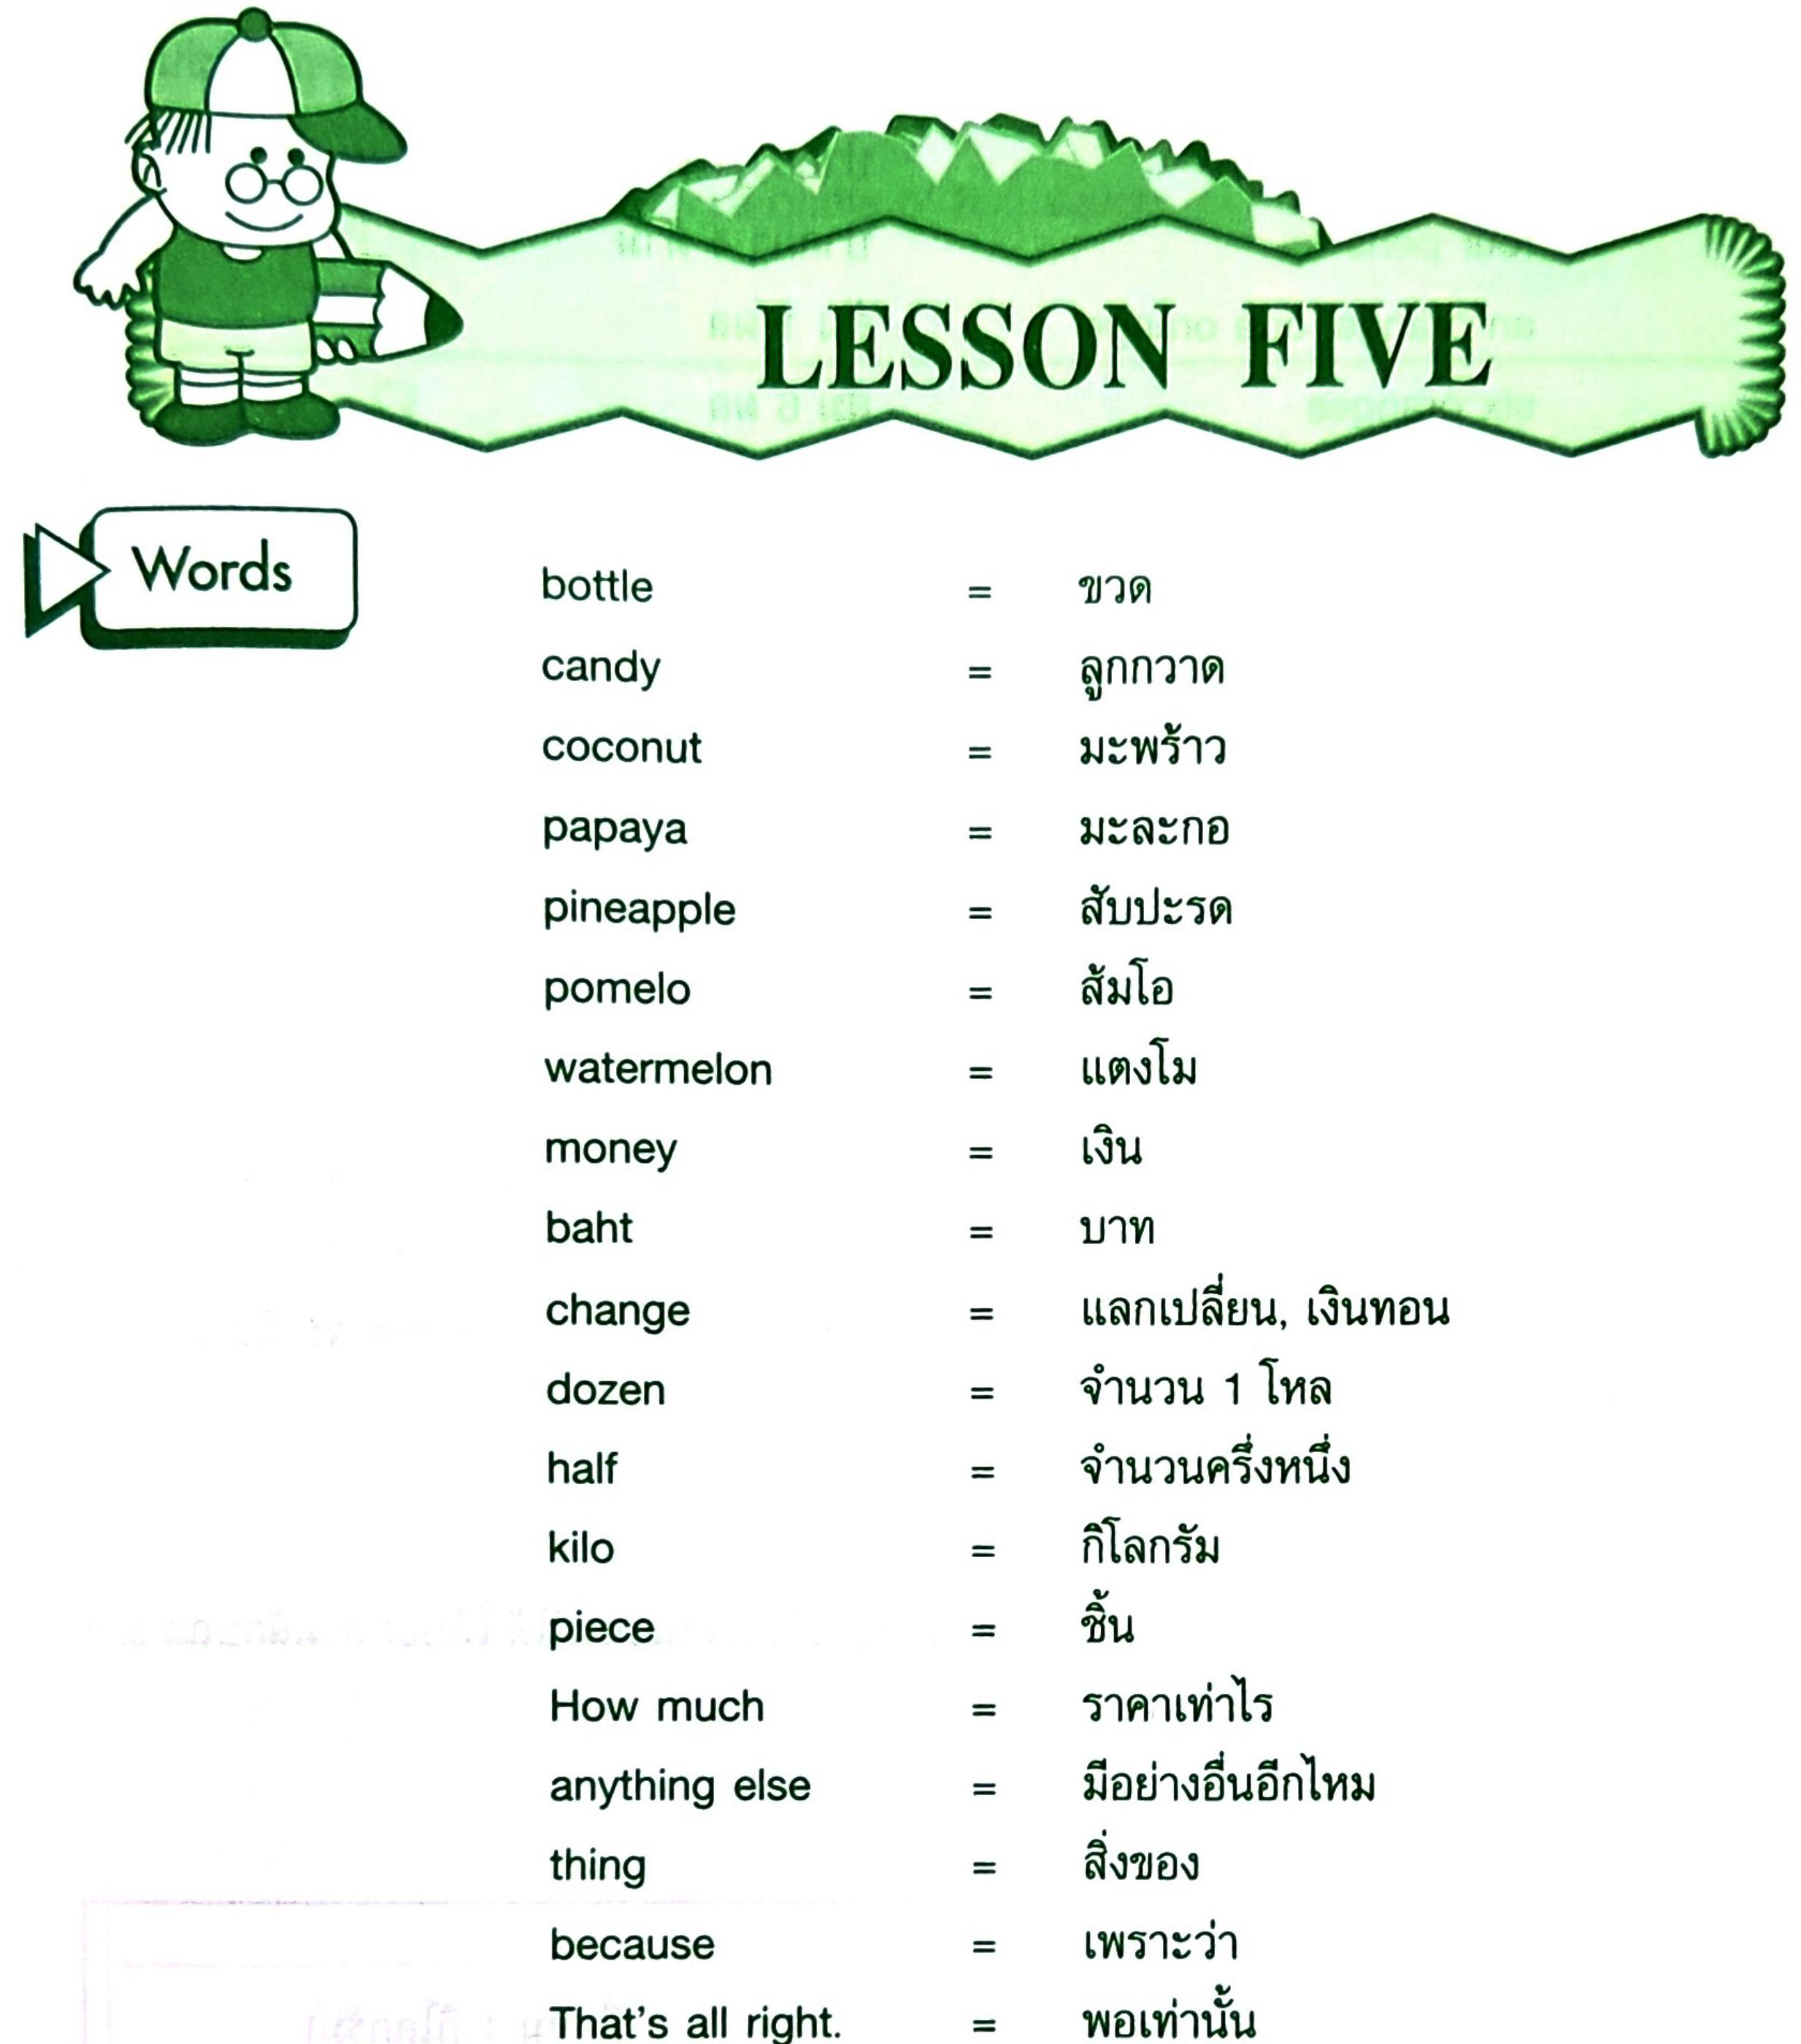
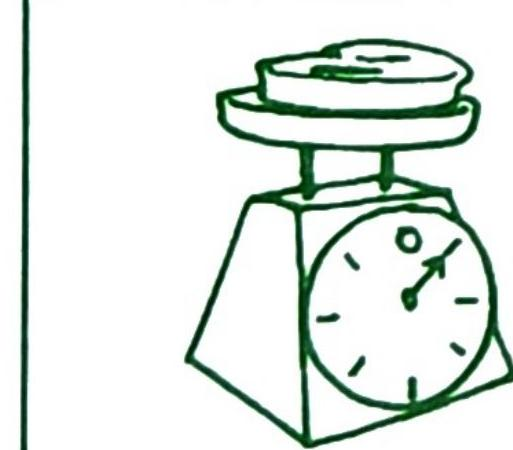
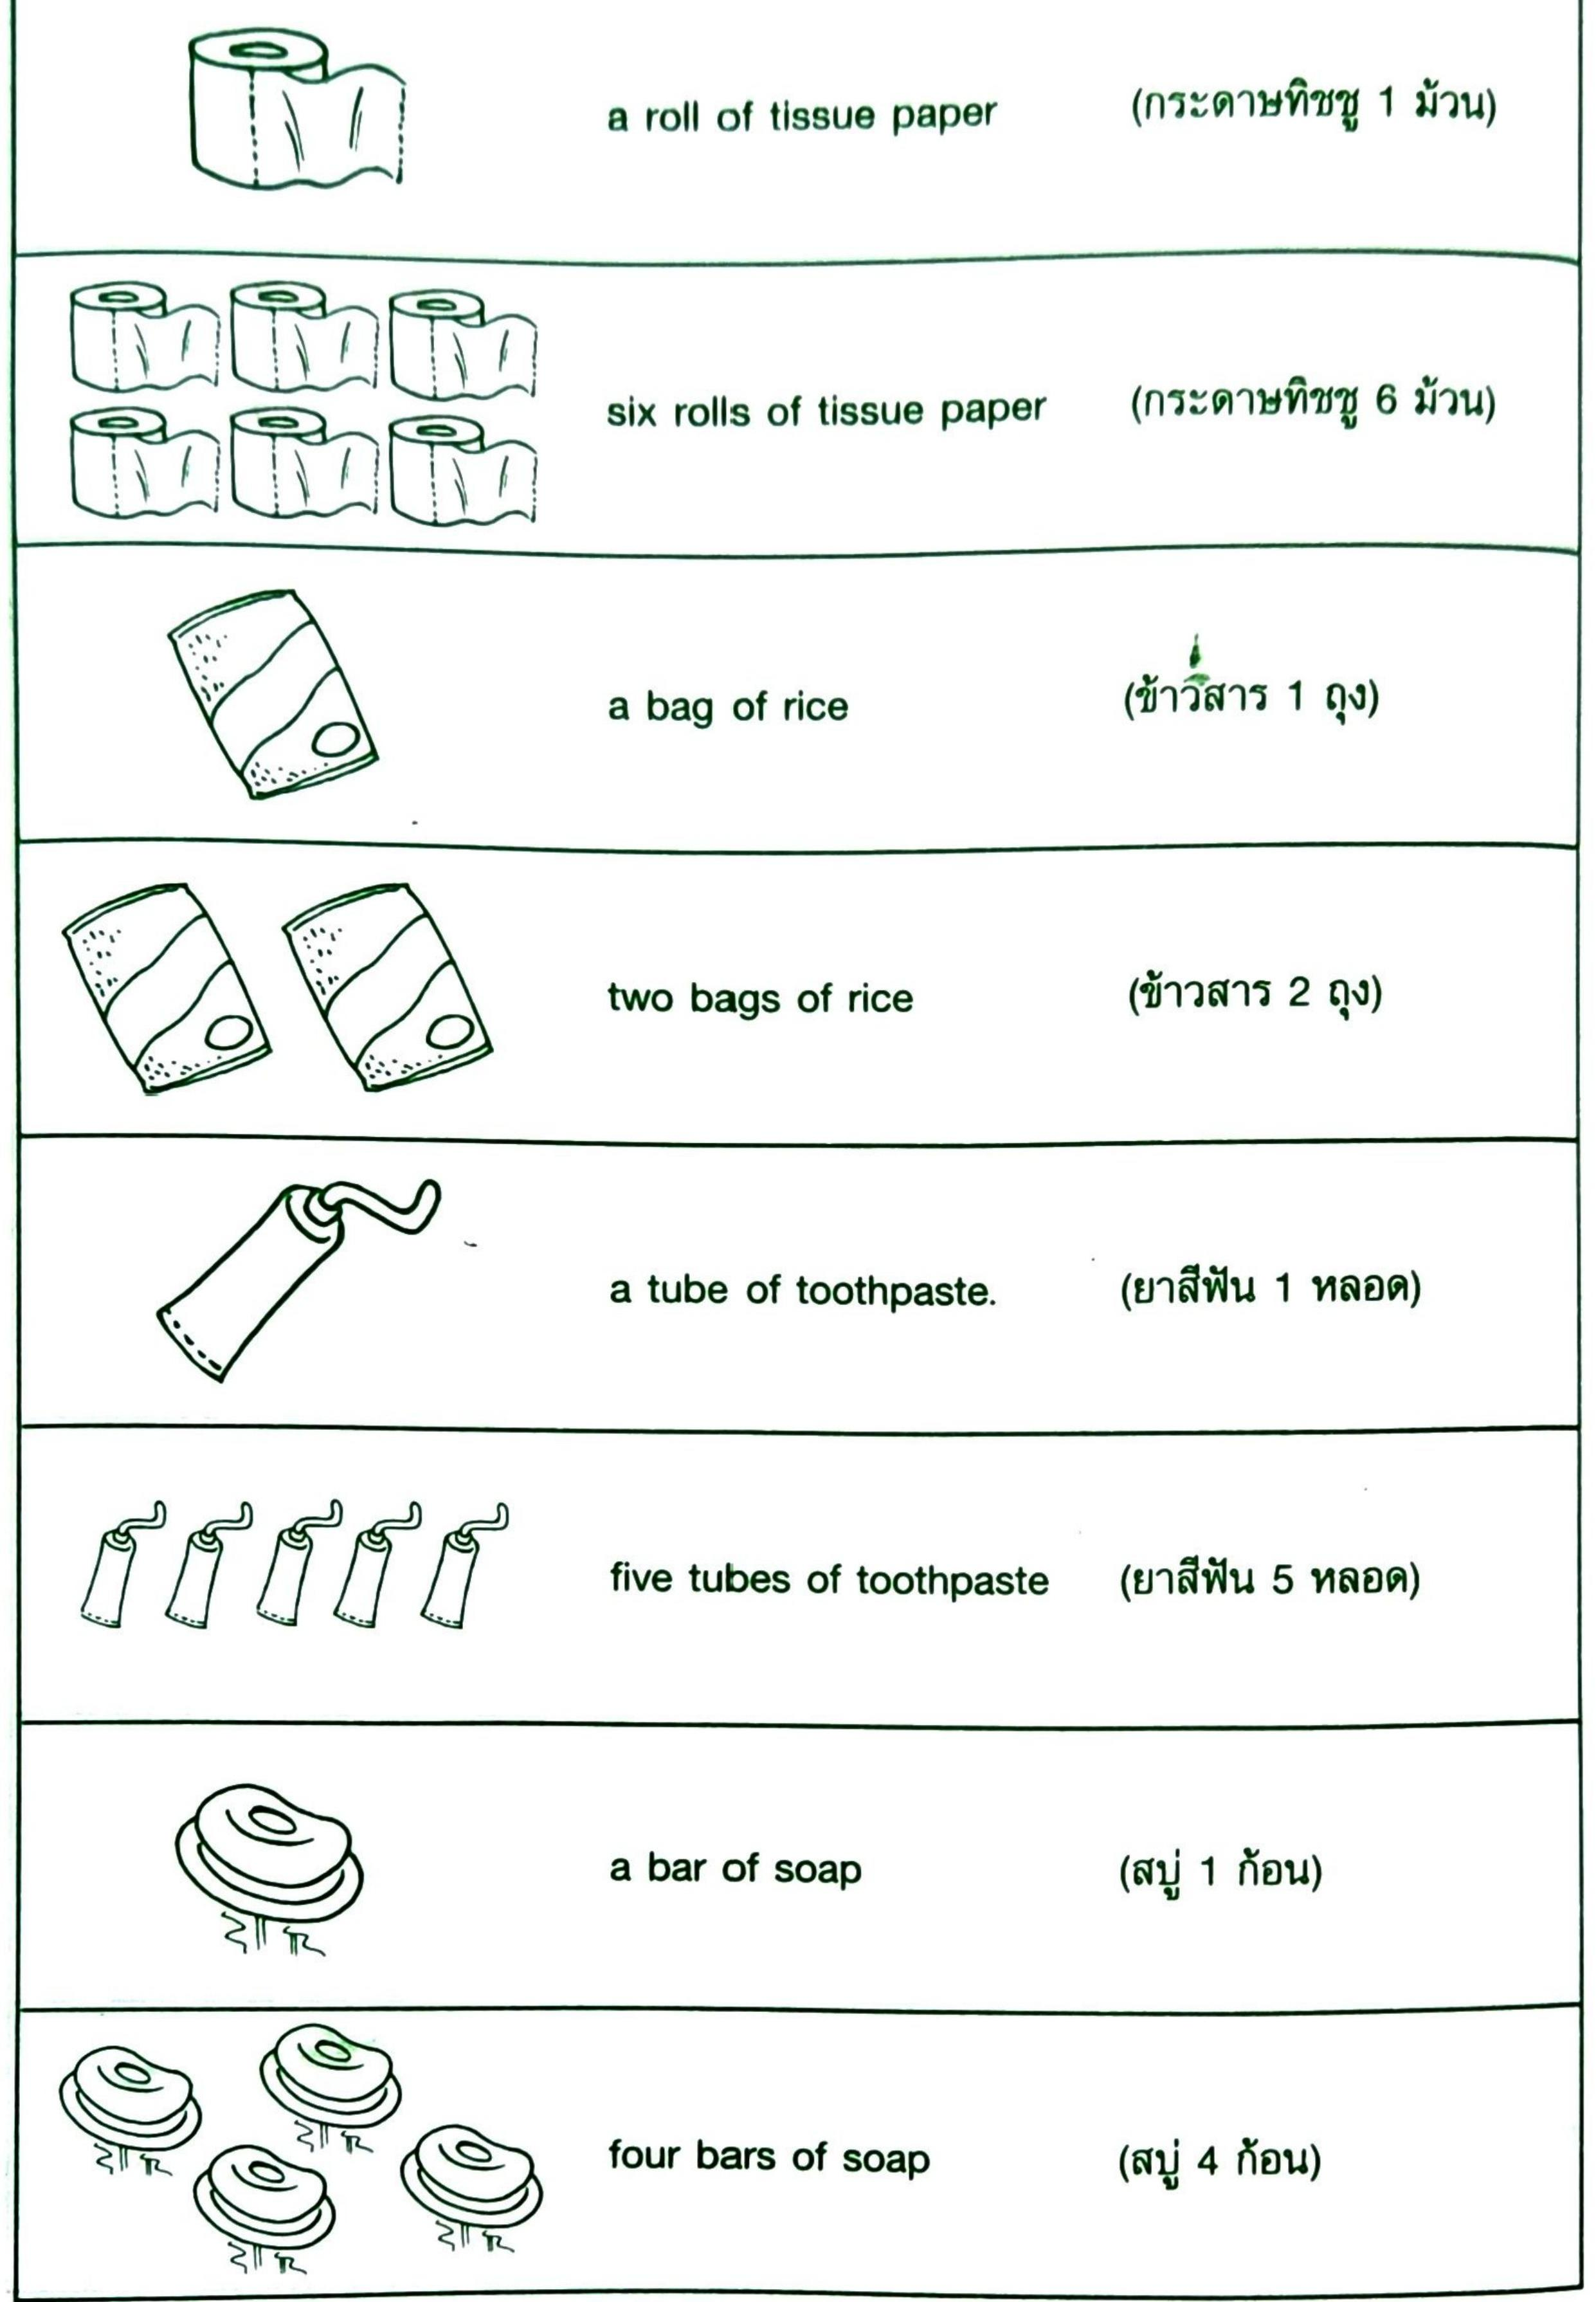
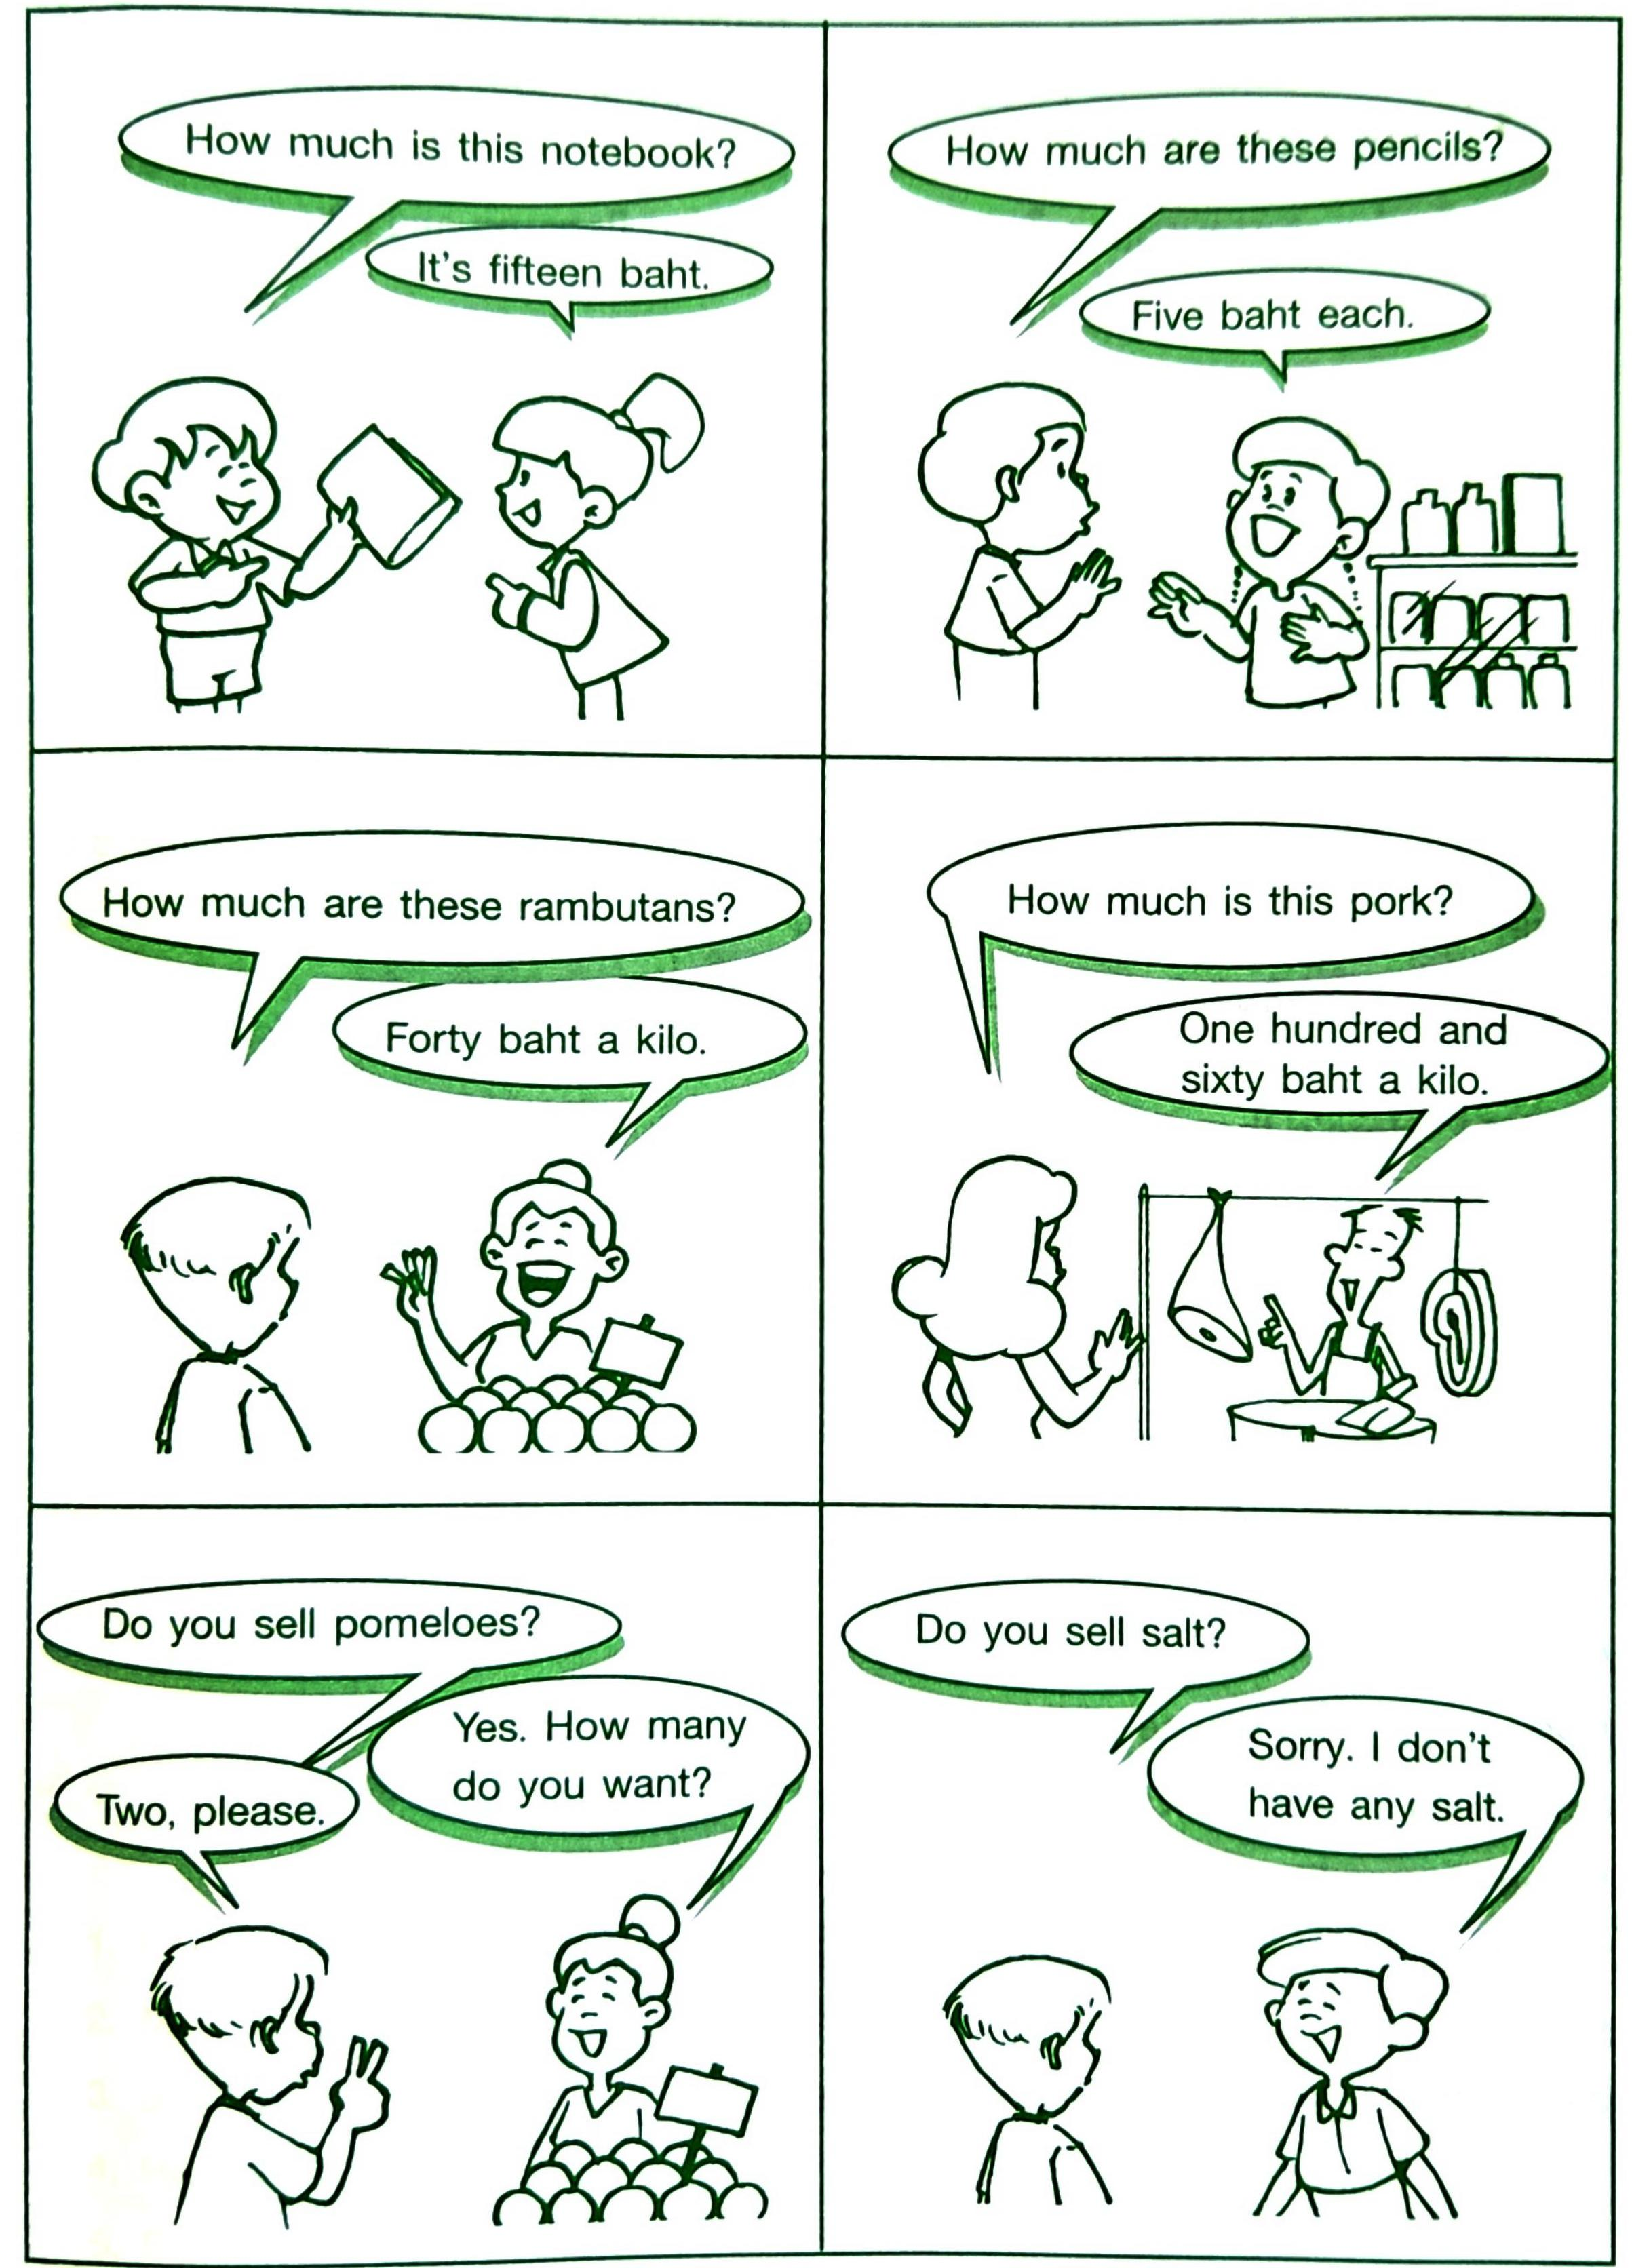

In [126]:
question_list = extract_text_from_image()

if len(question_list) < int(quiz_number):
  print("กรุณาเพิ่มปริมาณเนื้อหาหรือลดจำนวนข้อลง")

In [129]:
from docx import Document
from docx.shared import Pt, Inches, Cm
from docx.enum.text import WD_ALIGN_PARAGRAPH, WD_TAB_ALIGNMENT
from docx.enum.section import WD_SECTION

from docx.oxml import OxmlElement
from docx.oxml.ns import qn
import random


# creat header of quiz

!rm *.docx

def insert_picture(doc, image_path, width_cm=None):
    # Create a paragraph and set alignment to center
    paragraph = doc.add_paragraph()

    # Add the picture to the run within the paragraph
    run = paragraph.add_run()

    if width_cm:
        run.add_picture(image_path, width=Cm(width_cm))
    else:
        run.add_picture(image_path)

    # Set the paragraph alignment to center
    paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

def add_border(paragraph):
    # Access the paragraph properties
    p = paragraph._element

    # Create border XML element
    pPr = p.get_or_add_pPr()
    borders = OxmlElement('w:pBdr')

    # Define bottom border
    bottom = OxmlElement('w:bottom')
    bottom.set(qn('w:val'), 'single')  # Type of border (single, double, etc.)
    bottom.set(qn('w:sz'), '4')        # Size of the border (in eights of a point)
    bottom.set(qn('w:space'), '1')     # Space between border and text
    bottom.set(qn('w:color'), '000000') # Border color (hex code)

    # Append the bottom border to the borders element
    borders.append(bottom)
    pPr.append(borders)


def add_line(doc, text1, text2, last_row_status=False):
  # Create a paragraph
  paragraph = doc.add_paragraph()

  # Set the paragraph's tab stops (in this case at 3 inches)
  tab_stops = paragraph.paragraph_format.tab_stops
  tab_stop = tab_stops.add_tab_stop(Cm(16.2), WD_TAB_ALIGNMENT.RIGHT)

  # Add text before the tab

  # line 1
  run = paragraph.add_run(text1)
  run.font.name = 'TH Sarabun New'
  run.font.size = Pt(16)

  run.add_tab()  # Insert a tab character

  run = paragraph.add_run(text2)
  run.font.name = 'TH Sarabun New'
  run.font.size = Pt(16)


  if last_row_status: # if the status is last run this lines of code
    add_border(paragraph)
    doc.add_section(WD_SECTION.CONTINUOUS)

    # set property of section
    section = doc.sections[-1]
    sectPr = section._sectPr
    cols = sectPr.xpath('./w:cols')[0]
    cols.set(qn('w:num'),'2')
    cols.set(qn('w:sep'), '1') # set the line between column


# Create a document
doc = Document()


# Check if 'logo.png' already exists
if not os.path.exists('logo.png'):
  # upload logo pic
  uploaded = files.upload()

  if len(uploaded) > 1:
    print("Please upload only one image file.")
  else:
    # Process the uploaded image here
    for filename, data in uploaded.items():
      # Save or process the image data as needed
      with open(filename, 'wb') as f:
        f.write(data)
      print(f"Image '{filename}' uploaded successfully.")

      # Rename the uploaded file to 'logo.png'
      os.rename(filename, 'logo.png')
      print(f"Image '{filename}' renamed to 'logo.png' successfully.")
else:
  print("logo.png already exists, skipping upload.")



insert_picture(doc, 'logo.png', 2)


# Set the paper size to A4
section = doc.sections[0]
section.page_width = Inches(8.27)  # 210 mm in inches
section.page_height = Inches(11.69)  # 297 mm in inches
section.left_margin = Cm(2.3) # set margin
section.right_margin = Cm(2.3)





add_line(doc, f'ข้อสอบวัดผล{quiz_type}', f'{semester}  ปีการศึกษา {edu_year}')
add_line(doc, f'รายวิชา {subject_code} {subject_name}', f'{class_grade}')
add_line(doc, f'จำนวน {quiz_number} ข้อ {total_score} คะแนน เวลา {period} นาที', 'โรงเรียนบ้านโพนแท่น อำเภอเกษตรวิสัย จังหวัดร้อยเอ็ด', True)

# insert explanation heading
explanation_para = doc.add_paragraph()
explanation_run = explanation_para.add_run("คำชี้แจง จงเลือกคำตอบที่ถูกต้องที่สุด")
explanation_run.font.name = "TH Sarabun New"
explanation_run.font.size = Pt(16)


answer_correct_list = []
# Loop through questions and add them to the document
for idx, q in enumerate(question_list[:int(quiz_number)]):
    # Add question number and text
    question_para = doc.add_paragraph()
    question_run = question_para.add_run(f"{idx + 1}. {q['question']}")
    question_run.font.name = "TH Sarabun New"
    question_run.font.size = Pt(16)

    # insert prompt for generating image
    if 'image' in q:
      prompt_para = doc.add_paragraph()
      prompt_run = prompt_para.add_run(f"prompt: {q['image']}")
      prompt_run.font.name = "TH Sarabun New"
      prompt_run.font.size = Pt(10)


      # Shuffle the choices before adding them
    if random_choice_status == True:
      choices = q['choices']
      random.shuffle(choices)
    else:
      choices = q['choices']

    # Add answer choices
    for choice_idx, choice in enumerate(choices, start=97):  # ASCII 'a' = 97
        choice_para = doc.add_paragraph()
        choice_run = choice_para.add_run(f"   {chr(choice_idx)}) {choice}")
        choice_run.font.name = "TH Sarabun New"
        choice_run.font.size = Pt(16)

        # check if the correct choice compared with correct anwser
        if choice == q['answer']:
          answer_correct_list.append(chr(choice_idx))

        # Set paragraph spacing after each choice
        choice_para.paragraph_format.space_after = Pt(3)  # Set space after paragraph

# insert ending paragraph
ending_para = doc.add_paragraph()
ending_run = ending_para.add_run("ขอให้นักเรียนทุกคน โชคดีในการทำข้อสอบน่ะครับ ^_^")
ending_run.font.name = "TH Sarabun New"
ending_run.font.size = Pt(16)
ending_para.paragraph_format.space_before = Pt(50)  # Set space before paragraph
ending_para.alignment = WD_ALIGN_PARAGRAPH.CENTER  # Center-align the paragraph

# insert answer key
doc.add_page_break()
answer_heading_para = doc.add_paragraph()
answer_heading_para_run = answer_heading_para.add_run("เฉลย")
answer_heading_para_run.bold = True
answer_heading_para_run.font.size  = Pt(16)


for idx, (q, a) in enumerate(zip(question_list, answer_correct_list)):
  answer_para = doc.add_paragraph()
  question_run = answer_para.add_run(f"{idx + 1}. {q['answer']} ({a})")
  question_run.font.name = "TH Sarabun New"
  question_run.font.size = Pt(16)

# Save the document
doc.save('exam_template.docx')

print("Document created successfully!")


########################################################################################
from google.colab import files

files.download('exam_template.docx')

logo.png already exists, skipping upload.
Document created successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>